# SaaS Connector Pack Product EDA (2023)

> # Summary
>Summarized below are the highlights from the key findings from this analysis. Based on the 12 month period in 2023:
>
>General Performance Report
>* Total revenue for SaaS Connector Pack in 2023 is 28915.0940 dollars. It is profitable, with total net profit at 4099.1628 dollars. This put SaaS Connector Pack's profit margin at 14.18 %.
>* From January to March, revenue growth had been negative (-7% CMGR in February). Growth start to be positive by April, where positive numbers then fluctuate by month. In December the CMGR is around 14% growth. On average, CMGR is around 12%.
>* On average, SaaS Connector Pack have around 62 users each month, with 21 being active. There is a 78% likelihood of users churning in the next month.
>
>Monthly Cohort Analysis
>* Generally for all cohorts, retention rate would drop significantly after the initial month and would not increase above 50% retention in the cohort's lifetime. April cohort has had the highest number of active users (15), which retains at 6 in December (40% retention).
>* Subsequent purchases are inconsistent in value, with most cohorts having at least 1 month with no purchases. Yet, most cohorts are upwards-trending in their purchases. Generally, NDR rates would increase around Q4 period, with some cohorts making purchases which exceeds 100% NDR. 
>* In CLV, the January cohort (11 users) has many per user profit values above 40, with its highest profit at 68.36 in December.
>* Besides a few negative profit values per user in the July cohort (which is positive by December at 3.66), CLV for SaaS Connector Pack is positive.
>
>Profitability
>* Pre-discounts, the overall financial health of SaaS Connector Pack looks strong with consistently positive profits, despite some months showing negative profits.
>* Certain periods showed particularly high overall profits. Specifically, November had the highest overall profit with 1571.8530, followed by September with 804.1945, and December with 797.1747. These months stand out due to their significantly higher profits compared to other months.
>* January to March show lower profits, indicating a slow start to the year. Specifically, January had an overall profit of 216.7468, February had 163.1449, and March had 241.9911. 
>
>Discounting EDA
>* There were 316 invoices for SaaS Connector Pack in 2023, 126 of which were applied discounts (~ 40%), indicating strong demand at full price.
>* Overall profit drops significantly post-discount, especially in September and November. In September, profit dropped from 804.1945 to 547.8601, a reduction of about 31.85%. November saw a drop from 1571.8530 to 812.9970, a reduction of around 48.28%.
>* Most discounted orders are in the 20% discount range (28% of total orders), with 39 orders above 50% discounts (12% of total orders).
>* For SaaS Connector Pack, 0% discounts yield the highest and most stable profits. A 20% discount is positive but less profitable and more variable, especially in July. A 60% discount results in significant losses. To maximize profits, avoid discounts or use a 20% discount cautiously.
>
>Ideal Customer Profile (ICP) EDA
>* For the SaaS Connector Pack, prioritize the SMB segment. It leads in Total Accounts (52.40%), Net Revenue (47.10%), Total Quantity (51.32%), and Total Sales (47.10%), with the highest Net Profit Before Discount (3,446.19) and Net Profit (2,163.22). Keep up the Strategic segment's performance, holding substantial shares in Total Accounts (27.40%), Net Revenue (27.79%), Total Quantity (29.81%), and Total Sales (27.70%), with a Net Profit Before Discount (1,719.33) and Net Profit (989.12). Continue supporting the Enterprise segment, maintaining efficient cost management with a Net Profit Before Discount (946.82) and Net Profit (946.82).
>* SMB segment faces significant losses in Finance and Tech within APJ, but top-performing industries like Healthcare in AMER and Energy in EMEA show strong gains. Overall, gains surpass losses, highlighting a robust financial performance despite challenges in APJ.
>* Strategic segment sees notable losses in Communications and Energy within APJ, yet Finance in AMER and EMEA, along with Energy and Retail in EMEA, show substantial gains. These gains outweigh the losses, indicating a positive financial outlook, though APJ losses need addressing.
>* In the Enterprise segment, APJ struggles with losses in Transportation, Energy, and Retail, but top industries such as Finance in APJ, Tech, and Energy in AMER show strong gains. Gains exceed losses, highlighting solid financial health, but addressing APJ losses is crucial.
>* AMER's financial performance relies on peaks in April, July, September, and December. However, consistent sales and profits are challenging throughout the year, with discounts notably affecting net profits in February and October. Despite this, AMER shows strong performance during peak months.
>* EMEA region experiences substantial growth in sales and net profits from September, peaking in October, November, and December. It maintains positive net profits throughout the year despite discounts, demonstrating overall resilience and potential for early-year strategy improvements. EMEA has the highest performance in sales and net profits.
>* APJ region faces significant fluctuations in sales and net profits throughout the year, often resulting in negative figures due to heavy discount impacts. Despite substantial sales peaks, discounts erode net profits, indicating a need to revise pricing or discount strategies to improve profitability.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
pd.set_option('display.max_columns',30)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
df=df.drop('Row ID',axis=1)
df=df[[ 
        'Order ID',                        
        'Order Date',              
        'Date Key',                
    #'Contact Name',            
        'Customer ID',                
        'Customer',               
        'Segment',                 
        'Industry',                
        'Region',                 
        'Subregion', 
        'Country', 
        'City', 
    #'License',   
        'Product',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]

In [3]:
# Rekayasa fitur dan pembuatan kolom2 baru untuk keperluan analisis bisnis

# nilai diskon dalam bentuk dolar 
df['total_discount_in_dollars']=df['Sales'] * df['Discount']

# nilai sales satu unit produk
df['selling_price']=df['Sales'] / df['Quantity'] 

# net profit sebelum penerapan diskon
df['(net)_profit_before_discount']=df['Sales'] * df['Discount'] + df['Profit']

# net profit untuk penjualan 1 unit produk
df['net_profit_per_unit_sold']=df['Profit'] / df['Quantity'] 

# ubah nama kolom Profit menjadi 'net_profit'
df=df.rename(columns={'Profit':'net_profit'}) 

# melihat profit margin, idealnya SaaS diatas 20%
df['profit_margin']=df['net_profit'] / df['Sales'] * 100 

# pertimbangan nilai sales dari penerapan diskon
df['discounted_sales']=df['Sales'] - (df['Discount']*df['Sales']) 

In [4]:
# Rekayasa fitur, mengubah dari tipe data objek menjadi tipe data datetime untuk ekstraksi tahun dan bulan
df['Order Date'] = pd.DatetimeIndex(df['Order Date'])
df['month']=df['Order Date'].dt.month
df['year']=df['Order Date'].dt.year
df['year_month'] = df['Order Date'].dt.to_period('M')

------------

In [5]:
# for later cohort analysis, make a template for monthly period to see user activity by months
min_month = df['Order Date'].values.astype('datetime64[M]').min()
max_month = df['Order Date'].values.astype('datetime64[M]').max()
template_table = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
template_table.columns = ['Month']
# to merge month template with other df, with 'key'
template_table['key'] = 1

In [6]:
#slice main df by product first
prod11 = df.query("Product == 'SaaS Connector Pack'")
# then slice product df by year of analysis
prod11_2023=prod11.query('year == 2023')

----

### General Performance Report

In [7]:
# new column in product df to show each customer/user first purchase for the 2023 period, as "reg_date" or registration date
prod11_2023['reg_date'] = prod11_2023.groupby('Customer ID')[['Order Date']].transform('min')

C:\Users\arizk\AppData\Local\Temp\ipykernel_8208\702657775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod11_2023['reg_date'] = prod11_2023.groupby('Customer ID')[['Order Date']].transform('min')


In [8]:
# make a user df, from the product df
prod11_2023_user = prod11_2023.groupby(['Customer ID','Customer'])['reg_date'].min().reset_index()

In [9]:
# from user df, extract month datetime data, from date of first purchase
prod11_2023_user['reg_month']= prod11_2023_user['reg_date'].values.astype('datetime64[M]')

In [10]:
# with the month template df which only contains full 12 month timeframe, merge with user df
prod11_2023_user['key'] = 1
prod11_2023_user = template_table.merge(prod11_2023_user,on='key')
prod11_2023_user =prod11_2023_user.drop('key',axis=1)

In [11]:
# need to be rid of extra rows now, since merging with a month template means that there are null customer ids which doesn't make sense timewise.
prod11_2023_user = prod11_2023_user[prod11_2023_user['Month']>=prod11_2023_user['reg_month']]

In [12]:
prod11_2023['Month'] = prod11_2023['Order Date'].values.astype('datetime64[M]')
sales_month = prod11_2023.groupby(['Customer ID','Month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
account = prod11_2023.groupby(['Customer ID','Month'])[['Order ID']].nunique().reset_index()
account.columns = ['Customer ID','Month', 'account']
prod11_2023_user = prod11_2023_user.merge(sales_month,how='left',on=['Customer ID','Month'])
prod11_2023_user = prod11_2023_user.merge(account,how='left',on=['Customer ID','Month'])

C:\Users\arizk\AppData\Local\Temp\ipykernel_8208\4289696637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod11_2023['Month'] = prod11_2023['Order Date'].values.astype('datetime64[M]')


In [13]:
prod11_2023_user['user'] = 1    
prod11_2023_user['new user'] = (prod11_2023_user['reg_month'] == prod11_2023_user['Month']) * 1 
prod11_2023_user['active'] = (prod11_2023_user['Sales'] > 0) * 1   
prod11_2023_user['active_prev'] = (prod11_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID'])['active'].shift(1))
prod11_2023_user['change_status'] = (prod11_2023_user['active'] != prod11_2023_user['active_prev']) * 1
prod11_2023_user['session_id'] = (prod11_2023_user.sort_values(by=['Month'], ascending=True)
                       .groupby(['Customer ID'])['change_status'].cumsum())
prod11_2023_user['inactive'] = (prod11_2023_user['active'] == 0) * 1
prod11_2023_user['month_inactive'] = (prod11_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID','session_id'])['inactive'].cumsum())

In [14]:
#SaaS Connector Pack monthly user report (2023)
prod11_2023_report = prod11_2023_user.groupby('Month')[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active']].agg('sum')
prod11_2023_report

,Quantity,account,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active
Month,,,,,,,,,
2023-01-01,47.0000,11.0000,931.2240,830.1992,216.7468,115.7220,11,11,11
2023-02-01,25.0000,13.0000,864.6420,795.0332,163.1449,93.5361,20,9,11
2023-03-01,52.0000,14.0000,872.4540,737.4716,241.9911,107.0087,33,13,14
2023-04-01,95.0000,24.0000,2454.9800,2252.1728,609.2884,406.4812,48,15,21
2023-05-01,76.0000,22.0000,2046.2040,1929.3672,483.0532,366.2164,57,9,20
2023-06-01,56.0000,16.0000,1400.4000,1328.0768,265.7046,193.3814,64,7,15
2023-07-01,99.0000,26.0000,3400.7740,3062.4516,704.2889,365.9665,73,9,25
2023-08-01,68.0000,18.0000,1461.9900,1377.3244,409.4908,324.8252,79,6,18
2023-09-01,133.0000,35.0000,2982.5040,2726.1696,804.1945,547.8601,84,5,29


> To use some kind of SaaS KPI metrics from this dataset is quite a task. We need to calculate, among others, churn rate. But since it is a fictional dataset, and there isn't a clear guideline on what defines churn from the company (1 month, 2 month inactive and so on), here I'll just use the total number of old active users divided by total users at the beginning of the month, and using that number to substract 1. This would give an estimate of how many users stop purchasing/not active (churning) on a monthly period. But this doesn't reflect real churn rate as customers who might have churned more than 1 month can be counted as active if they make a purchase. For estimation purposes only. 

In [16]:
prod11_2023_churn = prod11_2023_user.groupby('Month')[['Sales', 'net_profit', 'user','new user','active']].agg('sum')
prod11_2023_churn['old active'] = (prod11_2023_churn['active'] - prod11_2023_churn['new user'])
prod11_2023_churn['user churn'] = ((1 - (prod11_2023_churn['old active'] / prod11_2023_churn['user'].shift(1))) * 100).round()
prod11_2023_churn

,Sales,net_profit,user,new user,active,old active,user churn
Month,,,,,,,
2023-01-01,931.2240,115.7220,11,11,11,0,NaN
2023-02-01,864.6420,93.5361,20,9,11,2,82.0000
2023-03-01,872.4540,107.0087,33,13,14,1,95.0000
2023-04-01,2454.9800,406.4812,48,15,21,6,82.0000
2023-05-01,2046.2040,366.2164,57,9,20,11,77.0000
2023-06-01,1400.4000,193.3814,64,7,15,8,86.0000
2023-07-01,3400.7740,365.9665,73,9,25,16,75.0000
2023-08-01,1461.9900,324.8252,79,6,18,12,84.0000
2023-09-01,2982.5040,547.8601,84,5,29,24,70.0000


>Here we can see that user churn is abnormally high, as SaaS monthly churn rate is usually only 5-10%. But the reality is such. As the dataset fictional, and there isn't any kind of subscription data, we can leave it as is. Furthermore, it should be noted that the lack of any subcription data makes it unrealistic to do a recurring revenue KPI (average revenue per user, monthly recurring revenue, etc).

In [17]:
#monthly avg. user churn
prod11_2023_churn[["user", "active", "user churn"]].mean()

user         61.5000
active       20.9167
user churn   78.2727
dtype: float64

In [22]:
# calculating Compound Monthly Growth Rate (CMGR) for the past 12 month
sales_report= prod11_2023_churn.reset_index()
sales_report['month'] = sales_report.index + 1

for ind, row in sales_report.iterrows():
    sales_report.loc[ind, "month difference"] = row['month'] - 1

sales_report['CMGR'] = np.power(sales_report['Sales'] / 931.2240, #<---first month sales
(1 / sales_report['month difference'])) - 1
sales_report ['CMGR'] = (sales_report ['CMGR']) * 100
sales_report = sales_report.drop(['month', 'month difference'], axis=1)

#with pd.option_context('use_inf_as_na', True):
    #sales_report = sales_report.dropna(subset=['CMGR'], how='all')
    
sales_report

,Month,Sales,net_profit,user,new user,active,old active,user churn,CMGR
0,2023-01-01,931.2240,115.7220,11,11,11,0,NaN,0.0000
1,2023-02-01,864.6420,93.5361,20,9,11,2,82.0000,-7.1499
2,2023-03-01,872.4540,107.0087,33,13,14,1,95.0000,-3.2069
3,2023-04-01,2454.9800,406.4812,48,15,21,6,82.0000,38.1438
4,2023-05-01,2046.2040,366.2164,57,9,20,11,77.0000,21.7513
5,2023-06-01,1400.4000,193.3814,64,7,15,8,86.0000,8.5025
6,2023-07-01,3400.7740,365.9665,73,9,25,16,75.0000,24.0949
7,2023-08-01,1461.9900,324.8252,79,6,18,12,84.0000,6.6558
8,2023-09-01,2982.5040,547.8601,84,5,29,24,70.0000,15.6620
9,2023-10-01,1724.1320,485.5319,87,3,20,17,80.0000,7.0839


In [23]:
# CMGR doesn't reflect all months growth rate, so Im going to use mean or median.
sales_report['CMGR'].skew()

0.36476992134969755

In [24]:
# The CMGR is very close to being normally distributed
sales_report['CMGR'].mean()

12.310375605786104

In [25]:
prod11_2023[['Sales', 'net_profit']].sum()

Sales        28915.0940
net_profit    4099.1628
dtype: float64

In [26]:
# Total monthly profit margin
(4099.1628/ 28915.0940) * 100

14.176550143672367

In [27]:
sales_report[['Sales', 'net_profit']].corr()

,Sales,net_profit
Sales,1.0000,0.8125
net_profit,0.8125,1.0000


**Key findings:**
1. On average, SaaS Connector Pack have around 62 users each month, with 21 being active. There is a 78% likelihood of users churning in the next month. Number of accounts and quantity of purchases tend to increase by the end of the year starting from September, but number of new users decrease (only 2 new user in December).
2. From January to March, revenue growth had been negative (-7% CMGR in February). Growth start to be positive by April, where positive numbers then fluctuate by month. In December the CMGR is around 14% growth. On average, CMGR is around 12%.
3. Total revenue for SaaS Connector Pack in 2023 is 28915.0940 dollars. It is profitable, with total net profit at 4099.1628 dollars. This put SaaS Connector Pack's profit margin at 14.18 %.
4. Increase in monthly revenue does not equal an increase in monthly profit. Sales of April was lower than in July (2454.9800 compared to 3400.7740), yet it yielded higher profit (406.4812 compared to 365.9665).

### Monthly Cohort Analysis

In [15]:
# Retention user
from operator import attrgetter
#----------------------------
# treat the month of registration as cohort
prod11_2023_user['date']=prod11_2023_user['Month'].dt.to_period('M')
prod11_2023_user['cohort']= prod11_2023_user['reg_month'].dt.to_period('M')
prod11_2023_user['lifetime'] = (prod11_2023_user['date'] - prod11_2023_user['cohort']).apply(attrgetter('n'))

In [17]:
prod11_2023_user.head(2)

,Month,Customer ID,Customer,reg_date,reg_month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,account,user,new user,active,active_prev,change_status,session_id,inactive,month_inactive,date,cohort,lifetime
0,2023-01-01,1002,Aetna,2023-01-02,2023-01-01,11.0000,474.4300,474.4300,199.2606,199.2606,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0
1,2023-01-01,1006,Aviva,2023-01-31,2023-01-01,7.0000,34.5800,34.5800,14.5236,14.5236,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0


In [16]:
prod11_cohort = prod11_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['user','new user','active']].agg('sum')
prod11_cohort ['active rate'] = (prod11_cohort['active'] / prod11_cohort['user']) * 100
prod11_cohort

,reg_month,lifetime,user,new user,active,active rate
0,2023-01-01,0,11,11,11,100.0000
1,2023-01-01,1,11,0,2,18.1818
2,2023-01-01,2,11,0,1,9.0909
3,2023-01-01,3,11,0,2,18.1818
4,2023-01-01,4,11,0,4,36.3636
...,...,...,...,...,...,...
73,2023-10-01,1,3,0,1,33.3333
74,2023-10-01,2,3,0,0,0.0000
75,2023-11-01,0,3,3,3,100.0000
76,2023-11-01,1,3,0,2,66.6667


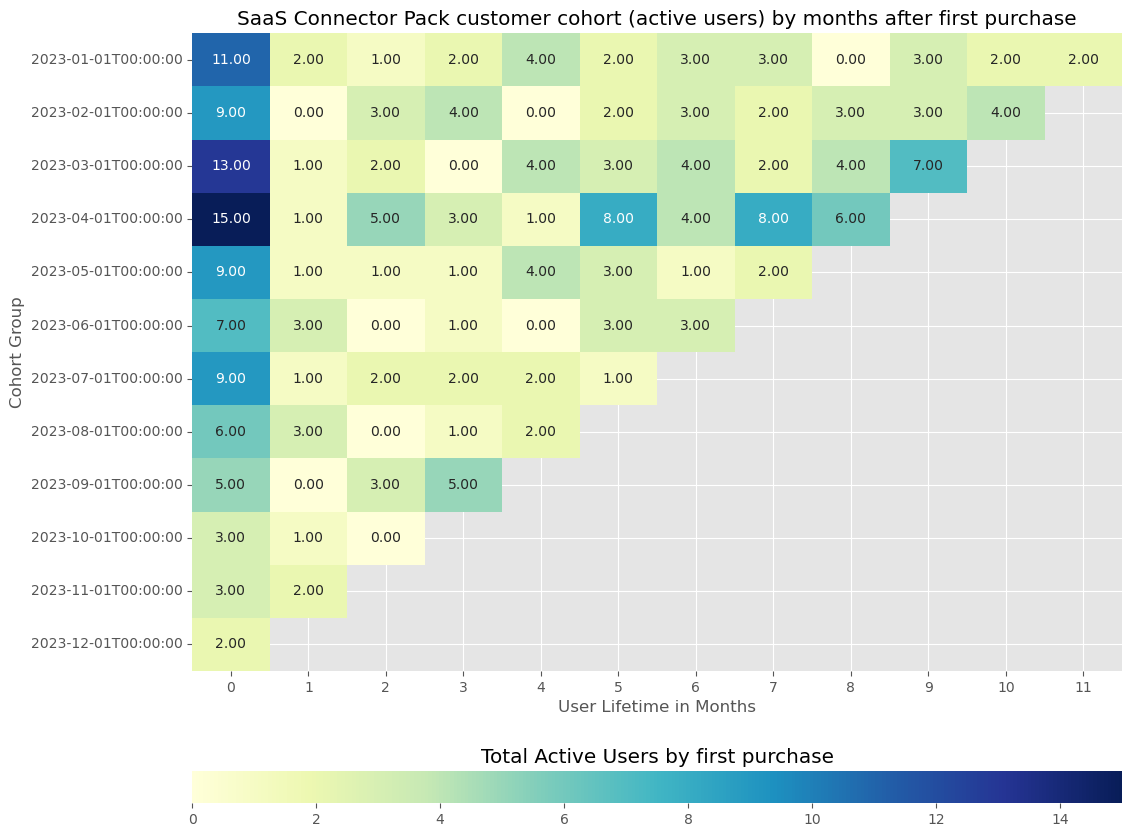

In [19]:
# customer cohort
pivot0 =prod11_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot0,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='SaaS Connector Pack customer cohort (active users) by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Total Active Users by first purchase'
)

plt.show()

- April cohort (4th cohort) has the highest number of active users, compared to other cohorts. Starting at 15 users and retaining at 6 in December. 
- For all cohorts, number of active users drop significantly after initial purchase.
- Number of active user sometime drop to 0 for some cohorts in their lifetime, though there is return purchases afterwards.

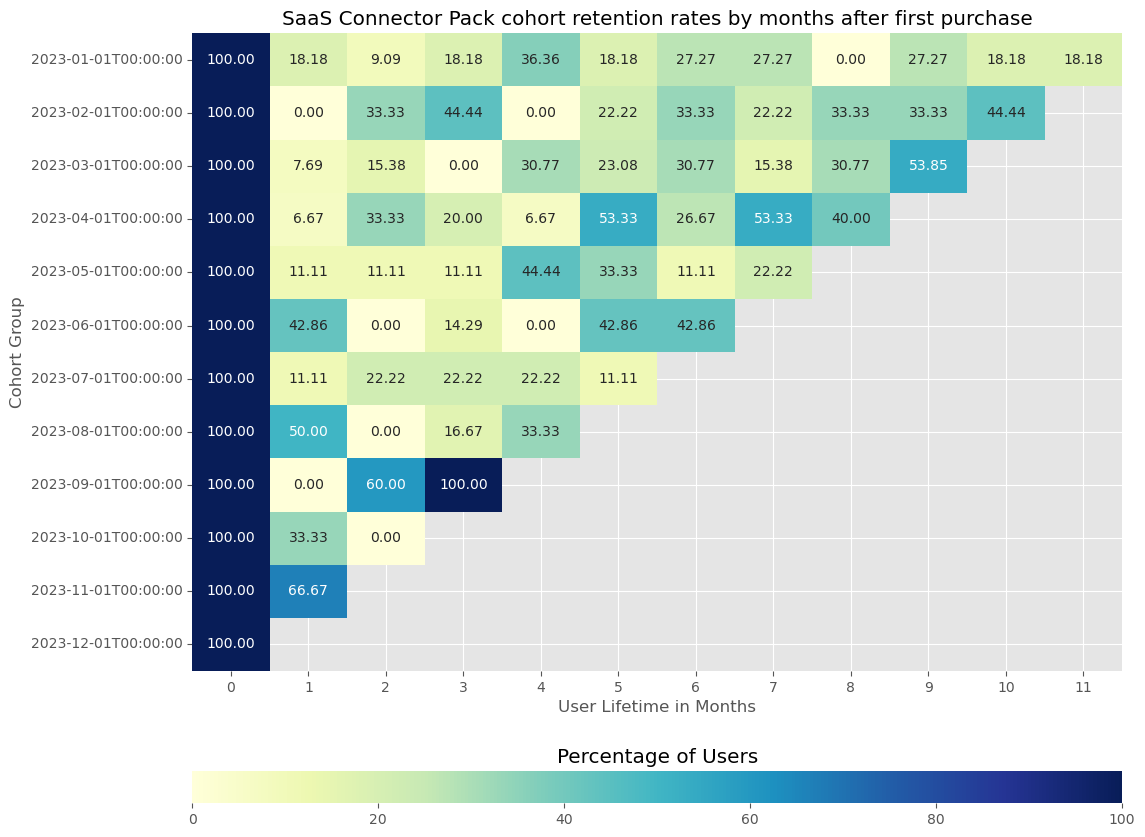

In [20]:
# customer retention
pivot1 =prod11_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active rate')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot1,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='SaaS Connector Pack cohort retention rates by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Percentage of Users'
)

plt.show()

- Generally for all cohorts, retention rate would drop significantly after initial month and would not increase above 50% in the cohort's lifetime.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

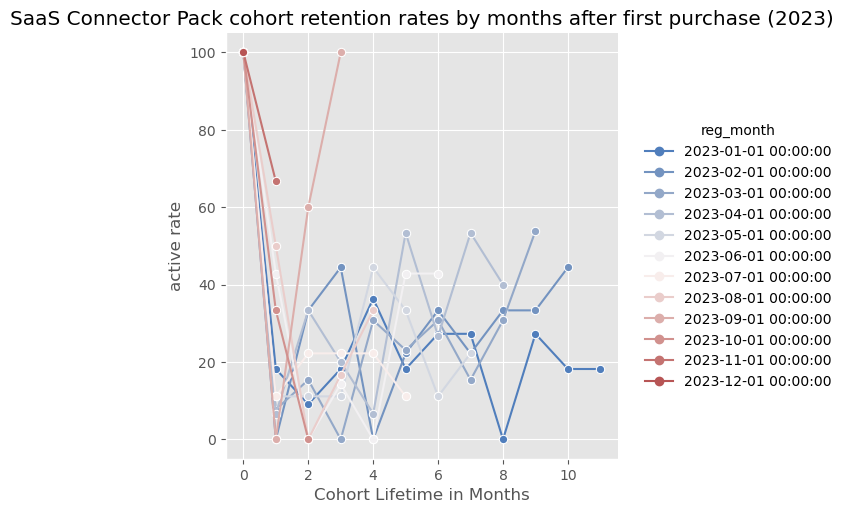

In [21]:
# retention rate lineplots
sns.relplot(data=prod11_cohort, x="lifetime", y="active rate",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('SaaS Connector Pack cohort retention rates by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

In [17]:
prod11_cohort2 =prod11_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum') 

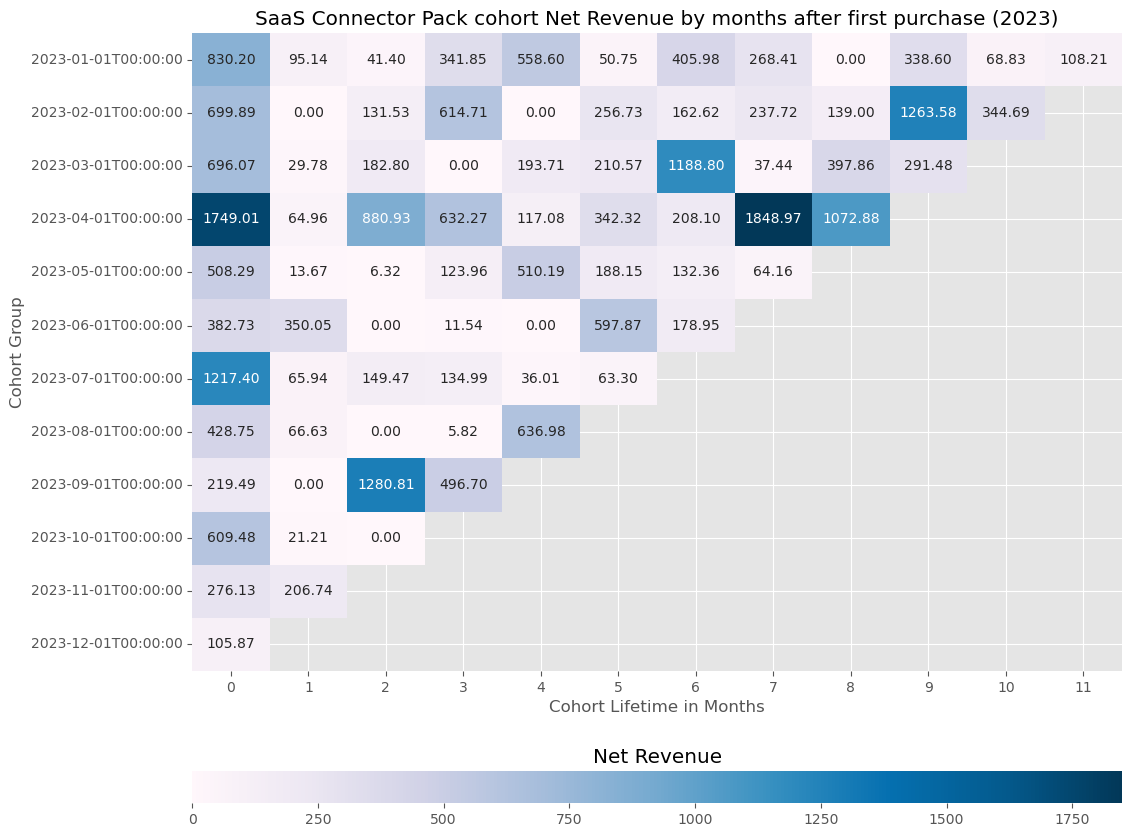

In [23]:
# Net Revenue by Cohort
pivot2 =prod11_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'discounted_sales')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot2,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='SaaS Connector Pack cohort Net Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Revenue'
)

plt.show()

- Generally for cohorts, subsequent purchases are inconsistent in value, with cohorts having at least 1 month with no purchases.
- April cohort have significant subsequent purchases after its initial purchase (1749.01--the highest initial purchase for all cohorts). In November its purchase exceed the initial month's purchase (1848.97). 
- The January cohort, which had a relatively high number of users (11), still have a month with no purchase (in September).

In [18]:
# calculating Net Dollar Retention (NDR), using initial month summed discounted sales
ds_max = prod11_2023_user.loc[prod11_2023_user['lifetime'] <= 0].groupby('reg_month')['discounted_sales'].sum().to_frame('ds_max')
prod11_cohort2 = prod11_cohort2.merge(ds_max,how='left',on=['reg_month'])
prod11_cohort2 ['net dollar retention'] = (prod11_cohort2['discounted_sales'] / prod11_cohort2['ds_max']) * 100

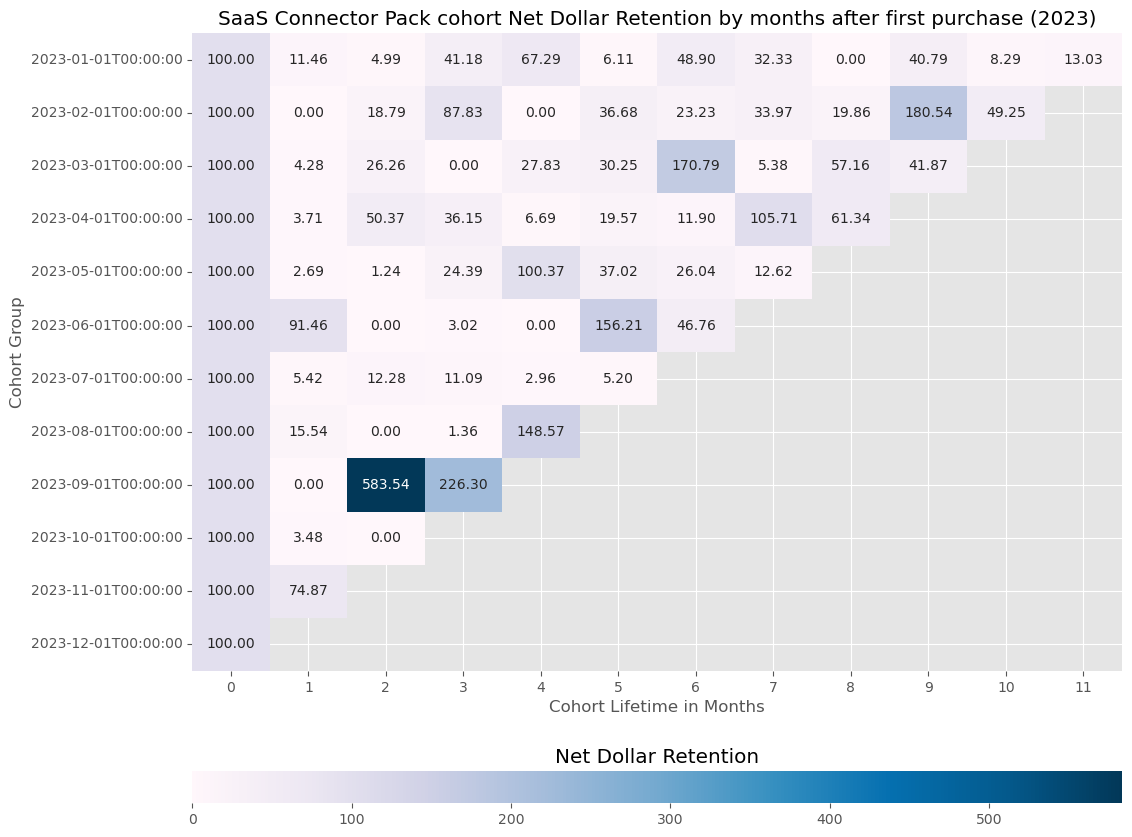

In [ ]:
# Net Dollar/Revenue Retention
pivot3 =prod11_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'net dollar retention')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot3,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='SaaS Connector Pack cohort Net Dollar Retention by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Dollar Retention'
)

plt.show()

*Notes
- in SaaS, especially B2B, NDR is extremely important. An NDR above 110% are, among other things, signs of underpricing (meaning that your product value is more than you realize, that some companies are getting more value out of your product than the value they could give to you). Its is also a sign of cohort growth, and that companies should try upselling, improving their products and getting more users on top of their growing existing users.
- under 100%, especially for Enterprise-level B2B SaaS, means that there is something wrong. Customer churn, they don't love the product. Rather than trying to get new users (investing in sales and marketing), B2B SaaS should try to ask their customers on why they're churning and invest on product improvement.

- Generally NDR rates are below 100% for SaaS Connector Pack, with some rates at 0 % at certain months for cohorts.
- There are instances which exceed 100%, occurring mostly at the end of year period. In September, the March and May cohort made significant purchases (170.79% and 100.37% in NDR, respectively). In November, the February, April, June, and September cohort made significant purchases (180.54%, 105.71%, 156.21%, and 583.54% in NDR, respectively). In December, the August and September cohort made significant purchases (148.57% and 226.30% in NDR, respectively). Although the September cohort made two significant purchases in terms of NDR, these are relatively low in value as its initial purchase is only 219.49. 

In [19]:
prod11_cohort2 ['cumulative lifetime revenue'] = prod11_cohort2.groupby(['reg_month'])['discounted_sales'].cumsum()

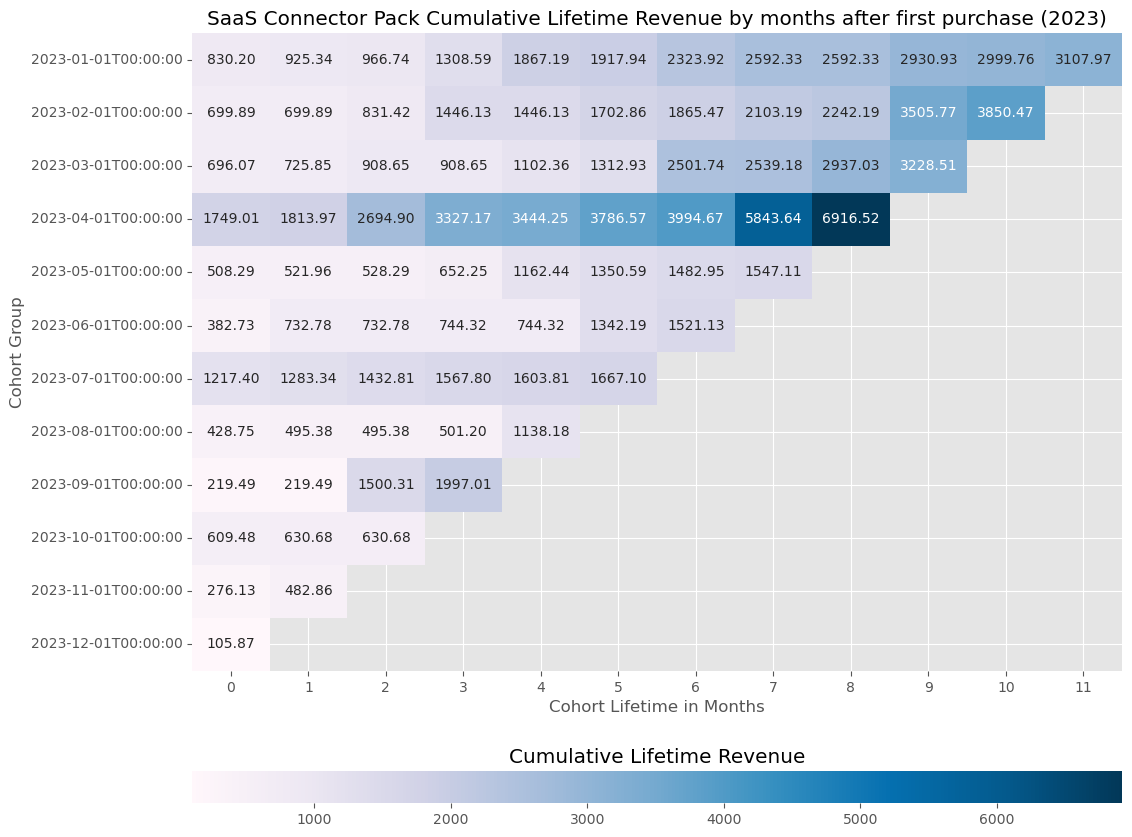

In [27]:
# cumulative lifetime revenue by cohort
pivot4 =prod11_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'cumulative lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot4,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='SaaS Connector Pack Cumulative Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Cumulative Lifetime Revenue'
)

plt.show()

Cumulative lifetime revenue adds up all the revenue purchases starting from the initial purchase, so that by the end of the month (and by subsequents months), you can see totals of revenue purchases.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

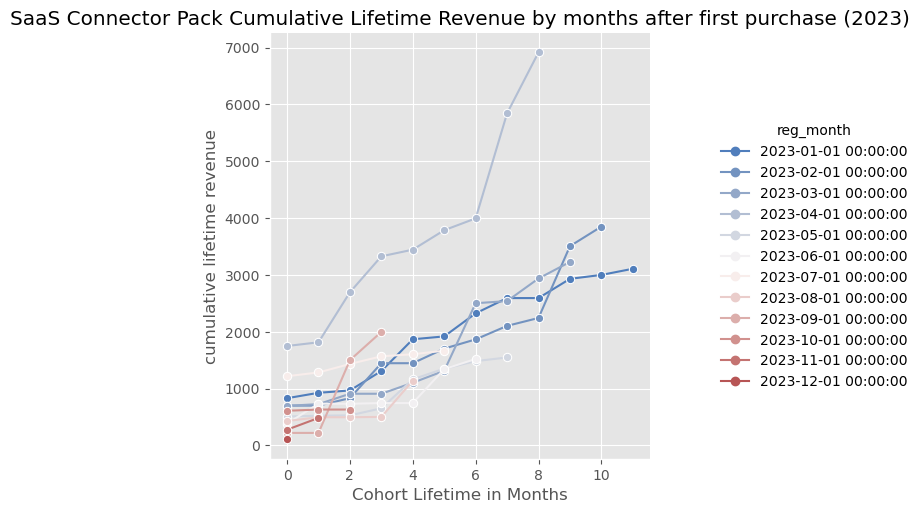

In [ ]:
# some data are easier to read with a different chart- cumulative lifetime revenue lineplots
sns.relplot(data=prod11_cohort2 , x="lifetime", y="cumulative lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('SaaS Connector Pack Cumulative Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- Though most cohort are upwards-trending, one cohort stands out in terms of its initial purchase and cumulative revenue; the April cohort. Starting with an initial purchase of 1749.01, by December it had generated close to 7k.

In [20]:
# calculating Customer Lifetime Revenue, using initial month number of active users
user_max = prod11_2023_user.loc[prod11_2023_user['lifetime'] <= 0].groupby('reg_month')['active'].sum().to_frame('user_max')
prod11_cohort2 = prod11_cohort2.merge(user_max,how='left',on=['reg_month'])
prod11_cohort2 ['customer lifetime revenue'] = (prod11_cohort2['cumulative lifetime revenue'] / prod11_cohort2['user_max'])

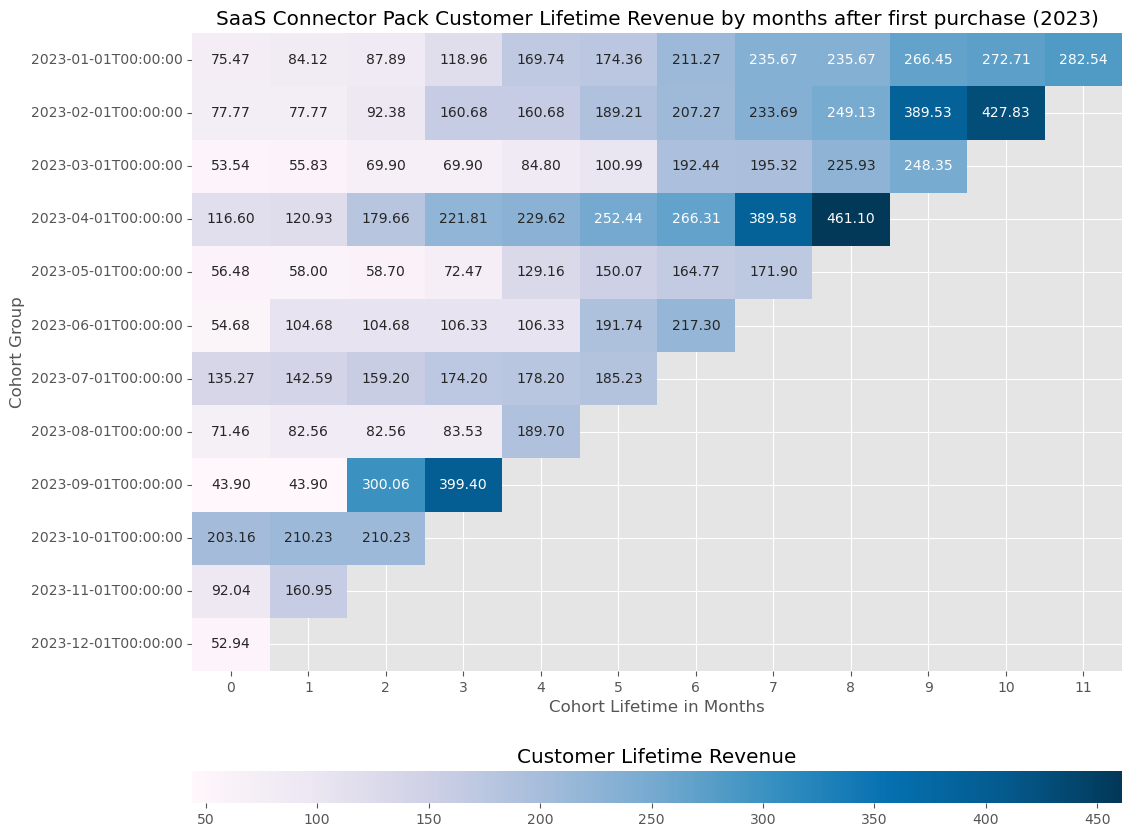

In [29]:
# per user Customer Lifetime Revenue, by cohort
pivot5 =prod11_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'customer lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot5,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='SaaS Connector Pack Customer Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Revenue'
)

plt.show()

Customer Lifetime Revenue gives an average of how much each customer in the cohort spends each month (on a per-customer basis).

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

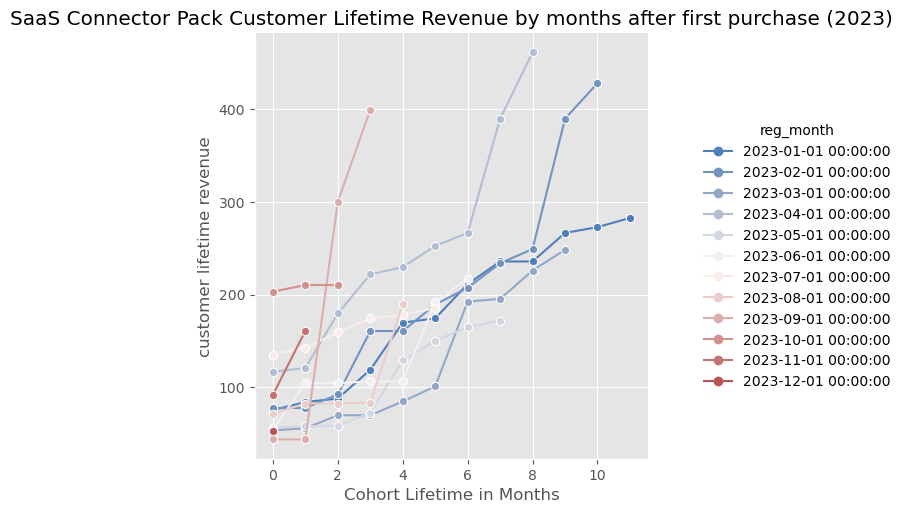

In [22]:
#  customer lifetime revenue lineplots
sns.relplot(data=prod11_cohort2, x="lifetime", y="customer lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('SaaS Connector Pack Customer Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- For most cohorts, per-user initial purchase starts off relatively low, around 100.
- March cohort has the highest per user value, 461.10 by December. Followed by the February cohort (427.83 by December) and the September cohort (399.40 by December). All other cohorts fall below 300 in per user value.

In [21]:
# CLV - but with net profit
prod11_cohort2 ['cum_net_profit'] = prod11_cohort2.groupby(['reg_month'])['net_profit'].cumsum()
# calculating Customer Lifetime Value, using initial month number of active users
prod11_cohort2 ['Customer Lifetime Value'] = (prod11_cohort2['cum_net_profit'] / prod11_cohort2['user_max'])

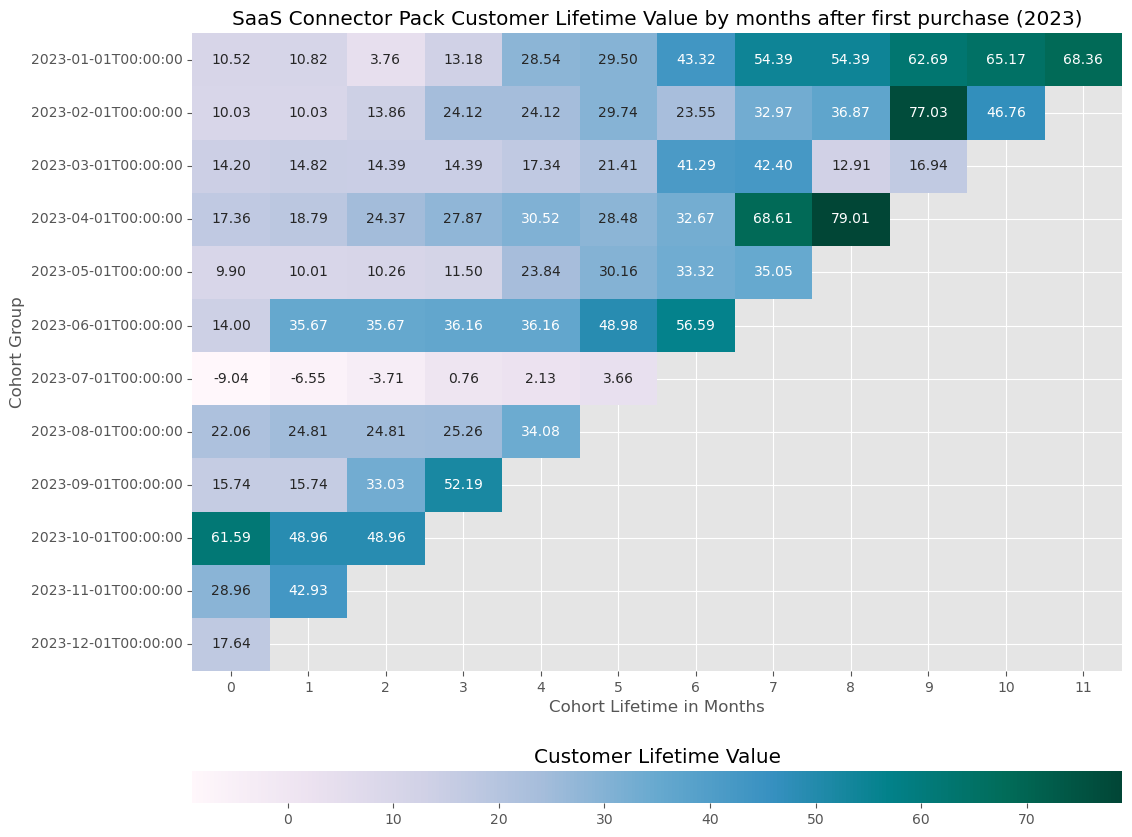

In [31]:
# Customer Lifetime Value, by cohort
pivot6 =prod11_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'Customer Lifetime Value')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot6,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBuGn',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='SaaS Connector Pack Customer Lifetime Value by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Value'
)

plt.show()

>Notes
>- Customer Lifetime Value (CLV), looks at profit instead of revenue, on a per user basis.
>- Usually, "profit" used in CLV calculation is Gross Profit, which is Revenue - Cost of Goods (cost of producing a product). Gross Profit is used to get Gross Margin rate (Gross Profit/Revenue), which then is multiplied with the Customer Lifetime Revenue to get the CLV values. CLV then reflect the profit gained on a per-user basis, after considering the production cost of a product.
>- In this dataset, however, there is no Cost of Goods Sold (COGS) data or any "expenses" data. We only have "net profit" which is Gross Profit - Other Expenses (marketing, overhead cost, taxes, etc), and so will use that in place of Gross Profit. So CLV here will be profit gained on a per-user basis after considering ALL expenses, including those not related to production cost. 
>- Lumping all expenses together may simplify things, but can provide distortion of data and less insights in real world cases. In SaaS, usually expenses not relating to production cost is related to Customer Acquisition Cost (CAC), and is used to calculate actual profit from users or customers. With CAC, you can ask questions such as: how much can we spend on getting customers, when we have a profit of ... from producing a product? Or, within context of this dataset, how much discount can we afford to actually make the most profit?

>Without expenses data, it is harder to gain accurate insights on profit and how to be accountable with profit, but its the data we have.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

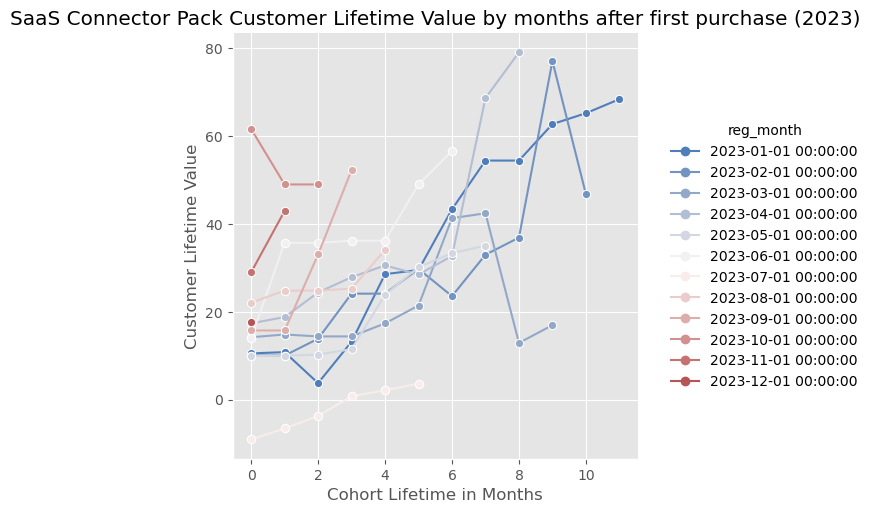

In [22]:
#  customer lifetime value lineplots
sns.relplot(data=prod11_cohort2, x="lifetime", y="Customer Lifetime Value",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('SaaS Connector Pack Customer Lifetime Value by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

-  Besides a few negative profit values per user in the July cohort (which is positive by December at 3.66), CLV for SaaS Connector Pack is positive.
- Though the March cohort marks the highest profit from all the cohorts per user (79.01 by December), we can see that most per user values in its lifetime are below 40 dollars. Meanwhile, the January cohort has many per user values above 40, with its highest profit at 68.36 in December. Based on the CLV, the January cohort show the most promise. However, since this CLV value is made using net profit instead of gross profit, here Costumer Acquisition Cost (CAC) is assumed to be already accounted for. Usually, CLV values (calculated with gross profit) is measured against CAC to see the actual value of a customer. Since CAC data doesn't exist in this dataset and is taked as granted, CLV of March cohort should not be taken at face value. Just for estimation purposes.

**Key findings:**
1. Generally for all cohorts, retention rate would drop significantly after the initial month and would not increase above 50% retention in the cohort's lifetime. April cohort has had the highest number of active users (15), which retains at 6 in December (40% retention).
2. Subsequent purchases are inconsistent in value, with most cohorts having at least 1 month with no purchases. Yet, most cohorts are upwards-trending in their purchases. Generally, NDR rates would increase around Q4 period, with some cohorts making purchases which exceeds 100% NDR.  
3. In CLV, the January cohort (11 users) has many per user profit values above 40, with its highest profit at 68.36 in December.
4. Besides a few negative profit values per user in the July cohort (which is positive by December at 3.66), CLV for SaaS Connector Pack is positive.

### Profitability

In [17]:
# calculating good & bad sales; positive and negative profit before discount was applied
pre_discount_negatives= prod11_2023[prod11_2023['(net)_profit_before_discount'] < 0]
pre_discount_positives= prod11_2023[prod11_2023['(net)_profit_before_discount'] > 0]
# negative profit
negatives = pre_discount_negatives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
negatives.columns = ['month', 'negative profits before discount']
# positive profit
positives = pre_discount_positives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
positives.columns = ['month', 'positive profits before discount']
# merge
plus_minus = pd.merge(negatives, positives, on='month', how='outer')
plus_minus
# turn negative values to positive for easier visuals
plus_minus['negative profits before discount'] = plus_minus['negative profits before discount'].abs()
# sort by month to ensure correct order
plus_minus = plus_minus.sort_values(by='month')

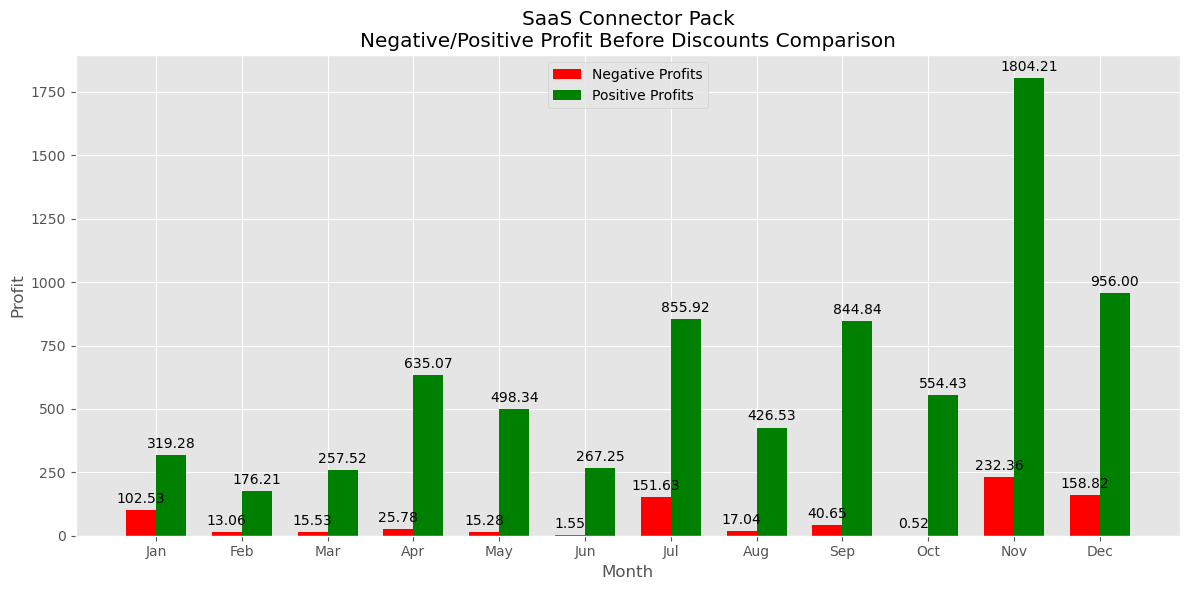

In [18]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(plus_minus['month']))

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width/2, plus_minus['negative profits before discount'], bar_width, label='Negative Profits', color='r')
bar2 = plt.bar(index + bar_width/2, plus_minus['positive profits before discount'], bar_width, label='Positive Profits', color='g')

# Annotate bars
for rect in bar1 + bar2:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('SaaS Connector Pack\nNegative/Positive Profit Before Discounts Comparison')
plt.xticks(ticks=np.arange(len(plus_minus)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper center')

# Show plot
plt.tight_layout()
plt.show()

**Key findings:**
1. Pre-discounts, the overall financial health of SaaS Connector Pack looks strong with consistently positive profits, despite some months showing negative profits.
2. Certain periods showed particularly high overall profits. Specifically, November had the highest overall profit with 1571.8530, followed by September with 804.1945, and December with 797.1747. These months stand out due to their significantly higher profits compared to other months.
3. January to March show lower profits, indicating a slow start to the year. Specifically, January had an overall profit of 216.7468, February had 163.1449, and March had 241.9911. 

### Discounting EDA

In [23]:
# profits that went negative because of discount + positive profits after discount 
post_discount_negatives = prod11_2023[(prod11_2023['net_profit'] < 0)]
post_discount_positives = prod11_2023[(prod11_2023['net_profit'] > 0)]
# negative profit
negatives2 = post_discount_negatives.groupby('month')['net_profit'].sum().reset_index()
negatives2.columns = ['month', 'negative profits after discount']
# positive profit
positives2 = post_discount_positives.groupby('month')['net_profit'].sum().reset_index()
positives2.columns = ['month', 'positive profits after discount']
# merge
plus_minus2 = pd.merge(negatives2, positives2, on='month', how='outer')
plus_minus2
# turn negative values to positive for easier visuals
plus_minus2['negative profits after discount'] = plus_minus2['negative profits after discount'].abs()
# Sort by month to ensure correct order
plus_minus2 = plus_minus2.sort_values(by='month')

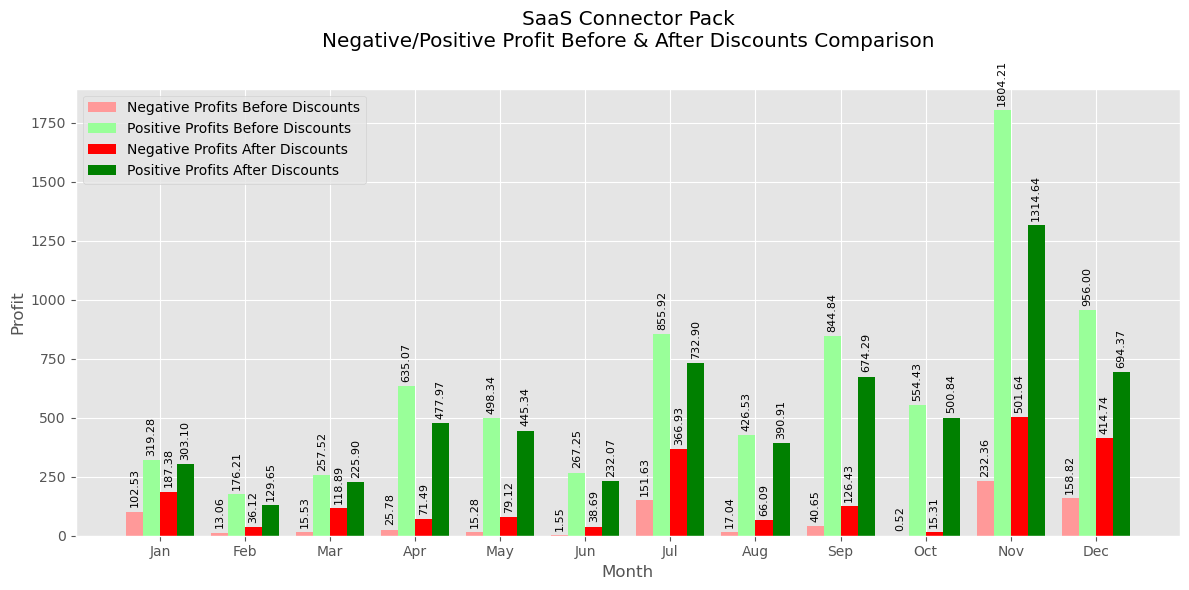

In [11]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(plus_minus['month']))

# Lighter shades of red and green
lighter_green = '#99ff99'
lighter_red = '#ff9999'

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width*1.5, plus_minus['negative profits before discount'], bar_width, label='Negative Profits Before Discounts', color=lighter_red)
bar2 = plt.bar(index - bar_width*0.5, plus_minus['positive profits before discount'], bar_width, label='Positive Profits Before Discounts', color=lighter_green)
bar3 = plt.bar(index + bar_width*0.5, plus_minus2['negative profits after discount'], bar_width, label='Negative Profits After Discounts', color='r')
bar4 = plt.bar(index + bar_width*1.5, plus_minus2['positive profits after discount'], bar_width, label='Positive Profits After Discounts', color='g')

# Annotate bars
for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom', fontsize=8, rotation=90)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('SaaS Connector Pack\nNegative/Positive Profit Before & After Discounts Comparison',  pad=30)
plt.xticks(ticks=np.arange(len(plus_minus2)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

- After discounts, the SaaS Connector Pack still maintains positive profits. However, overall profit has significantly decreased.
- September and November have been hit particularly hard in overall profit. In September, profit dropped from 804.1945 to 547.8601, a reduction of about 31.85%. November saw a drop from 1571.8530 to 812.9970, a reduction of around 48.28%.
- Despite severe profit reductions, September and November remain the highest in overall profit. December, however, is no longer in the top three because October's overall profit of 485.5319 surpasses December's 279.6363.
- Despite reductions, the SaaS Connector Pack has consistently stayed profitable each month after discounts, showcasing its resilience. However, careful consideration of discounts is needed to balance attracting customers and maintaining profitability.

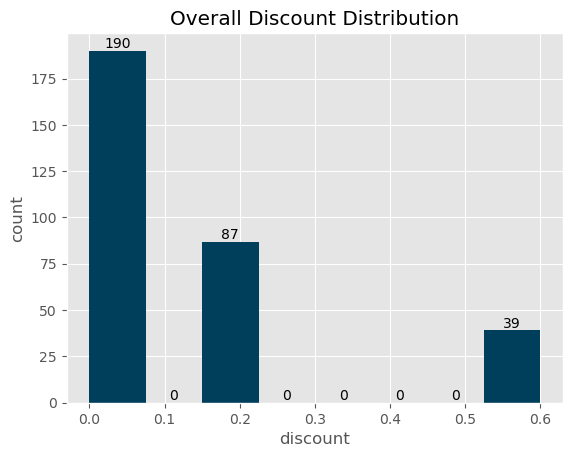

In [29]:
n, bins, patches = plt.hist(data=prod11_2023, x='Discount', bins=8, color='#003f5c')
plt.title('Overall Discount Distribution')
plt.xlabel('discount')
plt.ylabel('count')
# Annotating the bars with count values
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), 
             str(int(patches[i].get_height())), ha='center', va='bottom', color='black')
plt.show()

- There were 316 invoices for SaaS Connector Pack in 2023, 126 of which were applied discounts (~ 40%).
- Out of 126 orders that were discounted 87 are 20% discounts (28% of total orders) and 39 are discounts above 50% (12% of total orders).
- With most discounted orders in the 20% discount range, this imply that this is the optimal discount range that attracts the majority of customers. However, quite a significant number of orders are also applied very high discounts (above 50%). This could significantly impact overall profitability, especially if these orders are on high-value items.

In [37]:
# Range of Discounts (July, October, September, November, December)
filtered_df = prod11_2023[prod11_2023['month'].isin([7, 9, 10, 11, 12])]

# Aggregate statistics
grouped_data = filtered_df.groupby(['month', 'Discount'])[['net_profit']].agg(['std', 'mean', 'min', 'median', lambda x: x.quantile(0.75), 'max', 'count']).rename(columns={'<lambda_0>': '.75'})

# Flatten the multi-level columns for easier handling
grouped_data.columns = ['std', 'mean', 'min', 'median', '75%', 'max', 'count']
grouped_data = grouped_data.reset_index()

# display
grouped_data.set_index(['month', 'Discount'], inplace=True)
grouped_data.sort_index(level=0, inplace=True)
grouped_data

std      mean       min   median      75%      max  count
month Discount                                                               
7     0.0000    33.0161   29.1662    3.8720  10.5072  40.6956 114.6285     19
      0.2000    58.9690   29.4107   -2.2758   4.1912  15.8464 148.8450      6
      0.6000   196.6681 -121.5522 -348.6294 -10.3124  -8.0136  -5.7148      3
9     0.0000    35.6625   26.2323    2.3970  11.6496  34.8128 132.9900     21
      0.2000    17.9455    9.5269   -9.0904   4.1928   6.3879  61.3824     12
      0.6000    66.4955  -58.6706 -105.6900 -58.6706 -35.1609 -11.6512      2
10    0.0000    41.3852   26.7695    2.9372  14.7000  26.9730 175.1360     17
      0.2000     4.9105    5.7201    0.9856   5.5344   6.8253  15.5904      8
      0.6000     1.1960   -7.6551   -8.5008  -7.6551  -7.2323  -6.8094      2
11    0.0000    61.2127   36.8553    2.7354  14.2434  36.1605 272.7920     30
      0.2000    25.1708   14.6455  -12.9122   6.3612  19.0350  75.5424     13
      0.6000   185.0442  -96.6108 -427.4500 -17.7072 -13.9930  -4.0400      5
12    0.0000    21.8583   21.4450    1.5588  11.0250  29.2292 107.0388     27
      0.2000     6.9399    7.6906    0.0000   5.7312  10.4294  23.3160     15
      0.6000    94.9147  -46.0820 -292.9872  -5.8248  -2.3904  -1.3208      9

- A 0% discount drives higher and more stable profits. In July, mean profit is 29.1662 (median 40.6956). September shows a mean of 26.2323 (median 34.8128). October’s mean is 26.7695 (median 26.9730). November sees 36.8553 (median 36.1605). December follows with 21.4450 (median 29.2292)
- While a 20% discount can yield positive outcomes, it doesn't match the highest profitability of 0% discounts. For example, in July, the mean profit with a 20% discount is 29.4107 compared to 29.1662 with a 0% discount, but with higher variability (58.9690 vs 33.0161). In other months, the 0% discount clearly wins: September's mean profit is 26.2323 versus 9.5269 with a 20% discount; November's is 36.8553 compared to 14.6455; and December's is 21.4450 versus 7.6906. Thus, while the 20% discount stabilizes profit and reduces variability, it consistently falls short of the higher profitability offered by a 0% discount.
- 60% discounts cause consistent and significant financial harm. For example, July's mean profit is -121.5522, with a minimum of -348.6294. In September, the mean drops to -58.6706, with a minimum of -105.6900. October sees a mean of -7.6551, while November plummets to -96.6108, with a minimum of -427.4500. December's mean is -46.0820, with a minimum of -292.9872. However, 60% discounts might be strategically used to introduce high-paying clients to the updated version of this product, SaaS Connector Pack - Gold, potentially mitigating some financial risks through limited-time offers or exclusive access.
- A 0% discount brings the highest and most stable profits. A 20% discount can be positive but is less profitable and more variable, especially in July. A 60% discount results in consistent and significant losses. For the best profits, avoid discounts or use a 20% discount cautiously, and never use a 60% discount (except to introduce high-paying clients to another product). Even then, revenue from high-paying clients should outweigh the losses incurred from the initial 60% discount strategy (another analysis).

**Key findings:**
1. There were 316 invoices for SaaS Connector Pack in 2023, 126 of which were applied discounts (~ 40%). Most discounted orders are in the 20% discount range (28% of total orders), with 39 orders above 50% discounts (12% of total orders).
2. Overall profit drops significantly post-discount, especially in September and November. In September, profit dropped from 804.1945 to 547.8601, a reduction of about 31.85%. November saw a drop from 1571.8530 to 812.9970, a reduction of around 48.28%.
3. Despite profit reductions, the SaaS Connector Pack remains profitable each month, showcasing resilience.
4. For SaaS Connector Pack, 0% discounts yield the highest and most stable profits. A 20% discount is positive but less profitable and more variable, especially in July. A 60% discount results in significant losses. To maximize profits, avoid discounts or use a 20% discount cautiously. Use a 60% discount only to attract high-paying clients to other products (SaaS Connector Pack - Gold), ensuring their revenue offsets initial losses.

### Segmentation EDA

In [7]:
# make a segment df, from the product df
prod11_2023_segment = prod11_2023.groupby(['Segment'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
segment_account = prod11_2023.groupby(['Segment'])[['Order ID']].nunique().reset_index()
segment_account.columns = ['Segment','account']
prod11_2023_percents = segment_account.merge(prod11_2023_segment,how='left',on=['Segment'])
prod11_2023_percents

,Segment,account,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,Enterprise,59,207,7285.6260,6577.1348,1655.3147,946.8235
1,SMB,153,563,13619.2460,12336.2692,3446.1947,2163.2179
2,Strategic,80,327,8010.2220,7280.0164,1719.3270,989.1214


In [8]:
# calculate percentage of segment's business share by category
prod11_2023_percents['% Account']= prod11_2023_percents['account'] / prod11_2023_percents['account'].sum() *100
prod11_2023_percents['% Quantity']= prod11_2023_percents['Quantity'] / prod11_2023_percents['Quantity'].sum() *100
prod11_2023_percents['% Sales']= prod11_2023_percents['Sales'] / prod11_2023_percents['Sales'].sum() *100
prod11_2023_percents['% Net Revenue']= prod11_2023_percents['discounted_sales'] / prod11_2023_percents['discounted_sales'].sum() *100  
percents_plot = prod11_2023_percents.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_plot = percents_plot.melt(id_vars='Segment', var_name='Business_Share', value_name='Percent')
percents_plot = percents_plot.groupby(['Segment', 'Business_Share'])['Percent'].sum()
percents_plot = percents_plot.unstack('Segment')
prod11_plot = percents_plot.columns.tolist()

Text(0, 0.5, 'Percent')

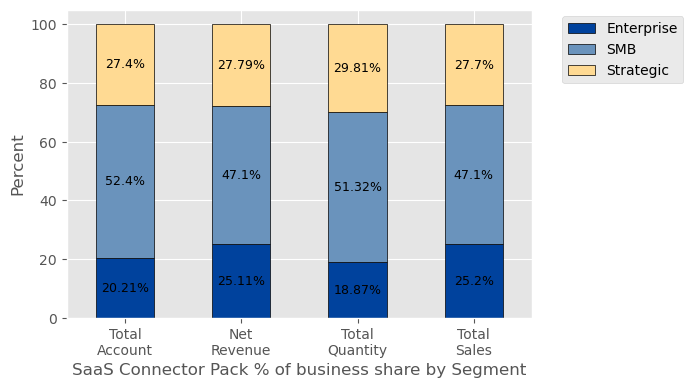

In [36]:
# Segments of Business Share
fig, ax = plt.subplots(figsize = (6, 4))

percents_plot[prod11_plot].plot(kind='bar', ax = ax, stacked=True, color=['#00429d', '#6a93bc', '#ffda93'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('SaaS Connector Pack % of business share by Segment')
plt.ylabel('Percent')

- In this chart, Customer accounts, quantity of product purchases, sales, and revenue (sales after discounts are applied) for the "SaaS Connector Pack" product in 2023 are summed and calculated into percentages based on 3 customer segmentation categories: Enterprise, SMB, and Strategic. The goal for this is to somewhat "map" the ideal customer profile (looking for underperforming segments, etc) for SaaS Connector Pack based on the last year of company activity.
- SMB segment holds the highest share in Total Accounts (52.40%), Net Revenue (47.10%), Total Quantity (51.32%), and Total Sales (47.10%), indicating a dominant presence for the SaaS Connector Pack.

([0, 1, 2],
 [Text(0, 0, 'Enterprise'), Text(1, 0, 'SMB'), Text(2, 0, 'Strategic')])

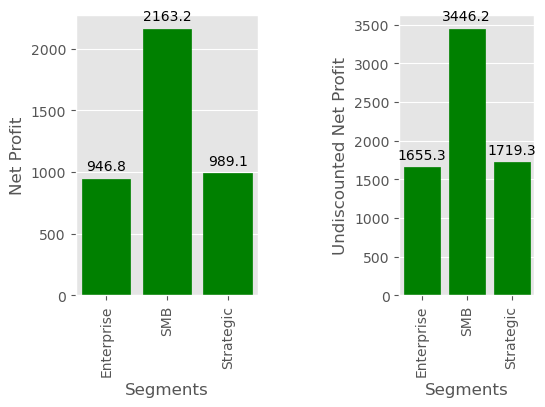

In [37]:
# SaaS Connector Pack net profit by Segment vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1)
net_profit_plot = sns.barplot(x='Segment', y='net_profit', data=prod11_2023_segment)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 4, 3)
undiscounted_plot = sns.barplot(x='Segment', y='(net)_profit_before_discount', data=prod11_2023_segment)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- SMB segment leads the SaaS Connector Pack in Total Accounts (52.40%), Net Revenue (47.10%), Total Quantity (51.32%), and Total Sales (47.10%). It also shows the highest Net Profit Before Discount (3446.1947) and a substantial positive Net Profit (2163.2179), making it the top performer.
- Strategic segment maintains significant shares in Total Accounts (27.40%), Net Revenue (27.79%), Total Quantity (29.81%), and Total Sales (27.70%). It demonstrates solid financial performance with a Net Profit Before Discount (1719.3270) and a positive Net Profit (989.1214).
- Enterprise segment, while having the lowest shares compared to the other segments, still maintains a consistent presence in Total Accounts (20.21%) and Net Revenue (25.11%). It achieves a positive Net Profit of 946.8235, demonstrating efficient cost management and profitability.

SMB segment is the key contributor to profitability for the SaaS Connector Pack, demonstrating strong contributions in both revenue and profitability. Meanwhile, the Strategic and Enterprise segment, although smaller in share, remains profitable and contributes positively to the overall success of the product.

### Further Inquiries on Segments -----------

In [12]:
# Copy-pasted code for Industry queries within segment
# Industries using SaaS Connector Pack within the SMB Segment
prod11_2023_industry_SMB = prod11_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
SMB_account = prod11_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','account']
prod11_2023_percents_SMB = SMB_account.merge(prod11_2023_industry_SMB,how='left',on=['Industry'])
prod11_2023_percents_SMB['% Account']= prod11_2023_percents_SMB['account'] / prod11_2023_percents_SMB['account'].sum() *100
prod11_2023_percents_SMB['% Quantity']= prod11_2023_percents_SMB['Quantity'] / prod11_2023_percents_SMB['Quantity'].sum() *100
prod11_2023_percents_SMB['% Sales']= prod11_2023_percents_SMB['Sales'] / prod11_2023_percents_SMB['Sales'].sum() *100
prod11_2023_percents_SMB['% Net Revenue']= prod11_2023_percents_SMB['discounted_sales'] / prod11_2023_percents_SMB['discounted_sales'].sum() *100  
percents_SMB = prod11_2023_percents_SMB.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_SMB = percents_SMB.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_SMB = percents_SMB.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_SMB = percents_SMB.unstack('Industry')
prod11_SMB = percents_SMB.columns.tolist()
# Industries using SaaS Connector Pack within the Strategic Segment
prod11_2023_industry_Strategic = prod11_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Strategic_account = prod11_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Strategic_account.columns = ['Industry','account']
prod11_2023_percents_Strategic = Strategic_account.merge(prod11_2023_industry_Strategic,how='left',on=['Industry'])
prod11_2023_percents_Strategic['% Account']= prod11_2023_percents_Strategic['account'] / prod11_2023_percents_Strategic['account'].sum() *100
prod11_2023_percents_Strategic['% Quantity']= prod11_2023_percents_Strategic['Quantity'] / prod11_2023_percents_Strategic['Quantity'].sum() *100
prod11_2023_percents_Strategic['% Sales']= prod11_2023_percents_Strategic['Sales'] / prod11_2023_percents_Strategic['Sales'].sum() *100
prod11_2023_percents_Strategic['% Net Revenue']= prod11_2023_percents_Strategic['discounted_sales'] / prod11_2023_percents_Strategic['discounted_sales'].sum() *100  
percents_Strategic = prod11_2023_percents_Strategic.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Strategic = percents_Strategic.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Strategic = percents_Strategic.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Strategic = percents_Strategic.unstack('Industry')
prod11_Strategic = percents_Strategic.columns.tolist()
# Industries using SaaS Connector Pack within the Enterprise Segment
prod11_2023_industry_Enterprise = prod11_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Enterprise_account = prod11_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Enterprise_account.columns = ['Industry','account']
prod11_2023_percents_Enterprise = Enterprise_account.merge(prod11_2023_industry_Enterprise,how='left',on=['Industry'])
prod11_2023_percents_Enterprise['% Account']= prod11_2023_percents_Enterprise['account'] / prod11_2023_percents_Enterprise['account'].sum() *100
prod11_2023_percents_Enterprise['% Quantity']= prod11_2023_percents_Enterprise['Quantity'] / prod11_2023_percents_Enterprise['Quantity'].sum() *100
prod11_2023_percents_Enterprise['% Sales']= prod11_2023_percents_Enterprise['Sales'] / prod11_2023_percents_Enterprise['Sales'].sum() *100
prod11_2023_percents_Enterprise['% Net Revenue']= prod11_2023_percents_Enterprise['discounted_sales'] / prod11_2023_percents_Enterprise['discounted_sales'].sum() *100  
percents_Enterprise = prod11_2023_percents_Enterprise.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Enterprise = percents_Enterprise.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Enterprise = percents_Enterprise.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Enterprise = percents_Enterprise.unstack('Industry')
prod11_Enterprise = percents_Enterprise.columns.tolist()

##### SMB Segment Notes

Text(0, 0.5, 'Percent')

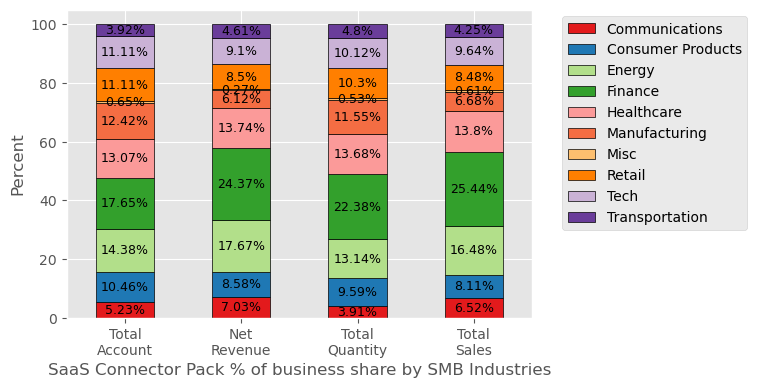

In [13]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_SMB[prod11_SMB].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('SaaS Connector Pack % of business share by SMB Industries')
plt.ylabel('Percent')

- Finance industry leads in Total Accounts (17.65%), Net Revenue (24.38%), Total Quantity (22.38%), and Total Sales (25.44%), indicating a dominant presence in the SMB segment.
- Energy industry holds significant shares in Net Revenue (17.67%) and Total Sales (16.48%), with a substantial presence in Total Accounts (14.38%).
- Healthcare and Tech industries maintain consistent shares across categories, contributing to Net Revenue (13.74% and 9.10% respectively).
- Retail and Communications industries also show notable shares in Net Revenue (8.50% and 7.03%) and Total Sales (8.48% and 6.52%).
- Manufacturing maintains a moderate presence across categories, contributing 12.42% to Total Accounts and 6.68% to Total Sales.
- Consumer Products industry has lower shares in comparison but remains consistent across categories.
- Misc industry shows the lowest shares across categories but still maintains a presence in the segment.
- Transportation industry, despite lower shares, contributes 4.25% to Total Sales.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Retail'),
  Text(8, 0, 'Tech'),
  Text(9, 0, 'Transportation')])

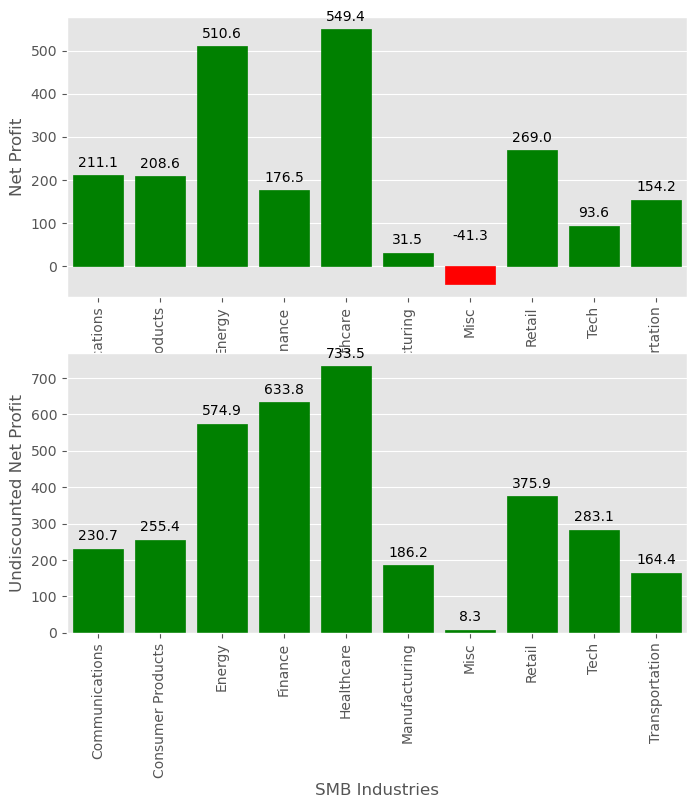

In [40]:
# SaaS Connector Pack net profit by SMB Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod11_2023_industry_SMB)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod11_2023_industry_SMB)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry leads the SMB segment in Total Accounts (17.65%), Net Revenue (24.38%), Total Quantity (22.38%), and Total Sales (25.44%). However, it shows a moderate Net Profit (176.5199) despite a high Net Profit Before Discount (633.7855).
- Healthcare industry shows strong performance with notable shares in Net Revenue (13.74%), Total Quantity (13.68%), and Total Sales (13.80%), achieving a high Net Profit Before Discount (733.4639) and a substantial positive Net Profit (549.4207).
- Energy industry maintains significant shares in Net Revenue (17.67%) and Total Sales (16.48%), with a positive Net Profit of 510.5950.
- Communications and Consumer Products industries contribute consistently across categories, achieving positive net profits of 211.1150 and 208.5584, respectively.
- Retail and Tech industries have moderate shares but maintain positive net profits, contributing 269.0343 and 93.5609, respectively.
- Manufacturing industry, despite moderate shares, shows lower profitability with a Net Profit of 31.4870.
- Misc industry has the lowest shares and reports a negative Net Profit (-41.2620), indicating challenges in profitability.
- Transportation industry shows moderate shares and a positive Net Profit of 154.1887.

Finance, Healthcare, and Energy industries are key contributors to profitability within the SMB segment of the SaaS Connector Pack, demonstrating strong contributions in both revenue and profitability. The Communications, Consumer Products, Retail, and Tech industries also show positive financial performance. The Manufacturing industry, although present, shows lower profitability, while the Misc industry faces challenges in achieving profitability.

##### Strategic Segment Notes

Text(0, 0.5, 'Percent')

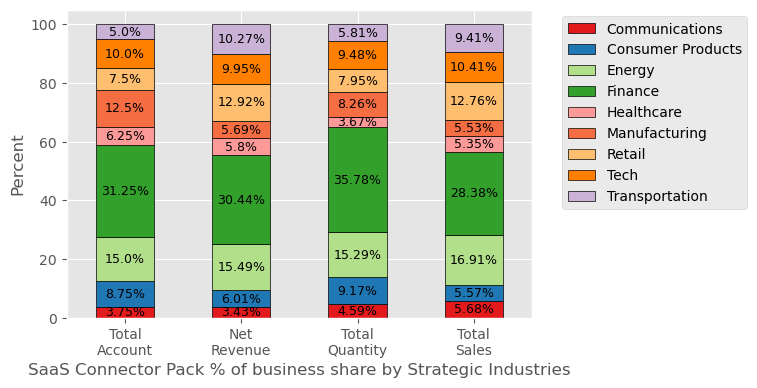

In [41]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Strategic[prod11_Strategic].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('SaaS Connector Pack % of business share by Strategic Industries')
plt.ylabel('Percent')

- Finance industry leads in Total Accounts (31.25%), Net Revenue (30.44%), Total Quantity (35.78%), and Total Sales (28.38%), indicating a dominant presence in the Strategic segment.
- Energy industry holds significant shares in Net Revenue (15.49%) and Total Sales (16.91%), with a substantial presence in Total Accounts (15.00%).
- Retail and Tech industries also show notable shares in Net Revenue (12.92% and 9.95%) and Total Sales (12.76% and 10.41%).
- Manufacturing and Transportation industries maintain consistent shares across categories, contributing to Total Accounts (12.50% and 5.00%) and Total Sales (5.53% and 9.41%).
- Communications, Consumer Products, and Healthcare industries have lower shares across categories but maintain a presence in the segment.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Transportation')])

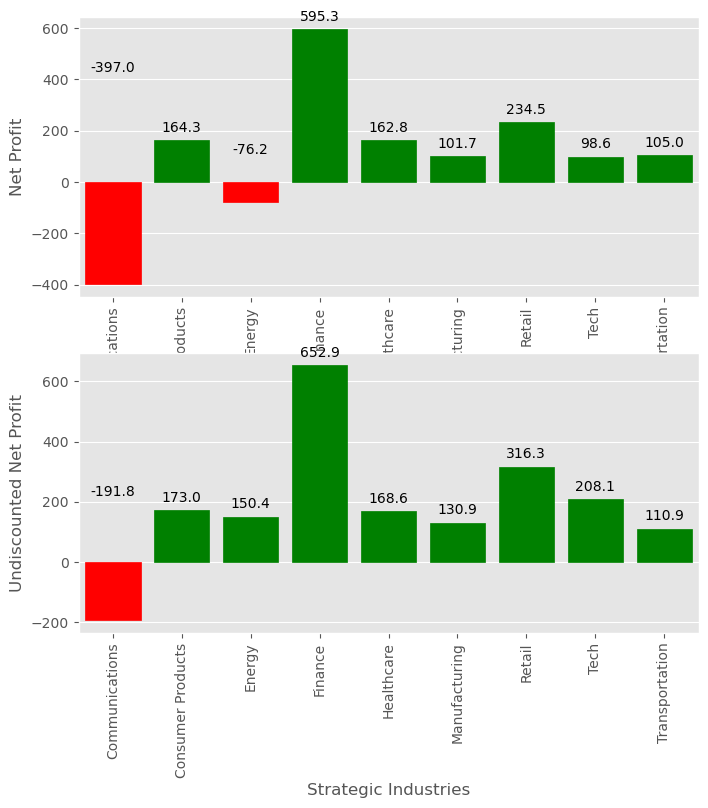

In [42]:
# SaaS Connector Pack net profit by Strategic Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod11_2023_industry_Strategic)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod11_2023_industry_Strategic)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry leads the Strategic segment in Total Accounts (31.25%), Net Revenue (30.44%), Total Quantity (35.78%), and Total Sales (28.38%). It also shows the highest Net Profit Before Discount (652.9085) and a substantial positive Net Profit (595.3173).
- Retail industry shows strong performance with notable shares in Net Revenue (12.92%) and Total Sales (12.76%), achieving a high Net Profit Before Discount (316.3187) and a positive Net Profit (234.4755).
- Consumer Products and Healthcare industries contribute consistently across categories, achieving positive net profits of 164.3155 and 162.7816, respectively.
- Energy industry maintains significant shares in Net Revenue (15.49%) and Total Sales (16.91%), but reports a negative Net Profit of -76.1979.
- Manufacturing and Tech industries, despite notable shares, show lower profitability with Net Profits of 101.7497 and 98.6252, respectively.
- Transportation industry shows moderate shares and a positive Net Profit of 105.0405.
- Communications industry reports negative profitability with a Net Profit of -396.9860, indicating challenges in achieving profitability.

Finance, Retail, Consumer Products, and Healthcare industries are key contributors to profitability within the Strategic segment of the SaaS Connector Pack, demonstrating strong contributions in both revenue and profitability. The Energy, Manufacturing, Tech, and Transportation industries, despite lower profitability, maintain a presence. The Communications industry faces significant challenges in achieving profitability.

##### Enterprise Segment Notes

Text(0, 0.5, 'Percent')

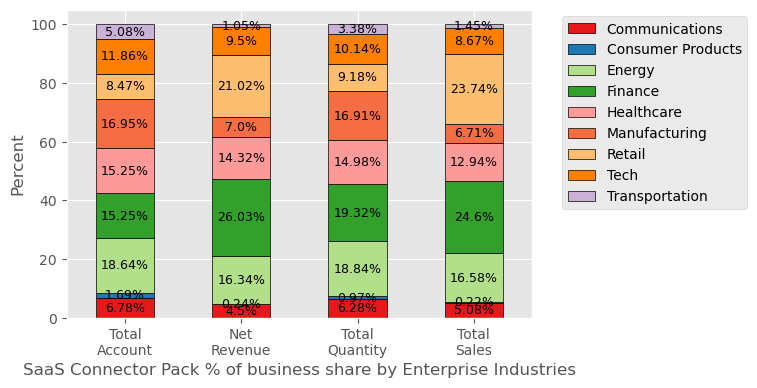

In [43]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Enterprise[prod11_Enterprise].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('SaaS Connector Pack % of business share by Enterprise Industries')
plt.ylabel('Percent')

- Finance industry holds the highest share in Net Revenue (26.03%) and Total Sales (24.60%), while contributing 15.25% to Total Accounts.
- Retail industry has a significant share in Net Revenue (21.02%) and Total Sales (23.74%), despite lower shares in Total Accounts (8.47%).
- Energy industry shows strong performance with substantial shares in Net Revenue (16.34%) and Total Sales (16.58%).
- Manufacturing maintains consistent shares across categories, contributing 16.95% to Total Accounts and 6.71% to Total Sales.
- Healthcare industry shows notable shares in Net Revenue (14.32%) and Total Sales (12.95%).
- Tech industry maintains a significant presence with 11.86% of Total Accounts and 9.50% of Net Revenue.
- Communications, Consumer Products, and Transportation industries have lower shares across categories but still maintain a presence in the segment.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Transportation')])

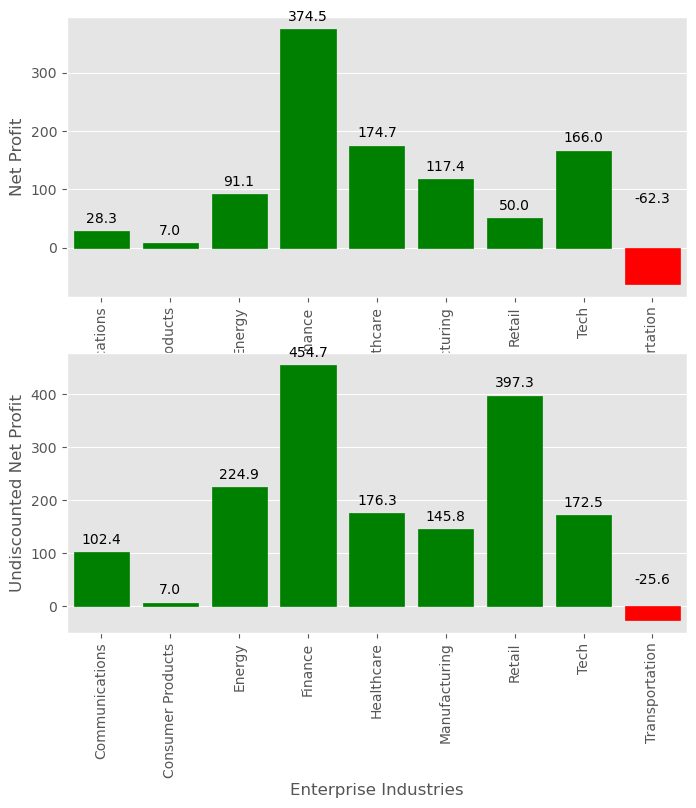

In [44]:
# SaaS Connector Pack net profit by Enterprise Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod11_2023_industry_Enterprise)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod11_2023_industry_Enterprise)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry holds the highest share in Net Revenue (26.03%) and Total Sales (24.60%). It also shows the highest Net Profit Before Discount (454.7254) and a substantial positive Net Profit (374.5414).
- Retail industry has a significant share in Net Revenue (21.02%) and Total Sales (23.74%), but shows a lower Net Profit (49.9700) despite a high Net Profit Before Discount (397.3028).
- Energy industry shows strong performance with substantial shares in Net Revenue (16.34%) and Total Sales (16.58%), achieving a positive Net Profit of 91.1318.
- Healthcare and Manufacturing industries maintain consistent shares across categories, achieving positive net profits of 174.7342 and 117.4272, respectively.
- Tech industry maintains a significant presence with 11.86% of Total Accounts and a positive Net Profit of 166.0130.
- Communications and Consumer Products industries, despite lower shares, achieve positive net profits of 28.3490 and 7.0048, respectively.
- Transportation industry reports negative profitability with a Net Profit of -62.3479, indicating challenges in achieving profitability.

Finance, Healthcare, Manufacturing, and Tech industries are key contributors to profitability within the Enterprise segment of the SaaS Connector Pack, demonstrating strong contributions in both revenue and profitability. The Energy industry shows positive financial performance, while the Retail industry, despite high revenue and sales, faces challenges in achieving higher profitability. The Communications and Consumer Products industries maintain a presence and contribute positively. The Transportation industry faces significant challenges in achieving profitability.

**Key findings:**
1. For the SaaS Connector Pack, prioritize the SMB segment. It leads in Total Accounts (52.40%), Net Revenue (47.10%), Total Quantity (51.32%), and Total Sales (47.10%), with the highest Net Profit Before Discount (3,446.19) and Net Profit (2,163.22). Keep up the Strategic segment's performance, holding substantial shares in Total Accounts (27.40%), Net Revenue (27.79%), Total Quantity (29.81%), and Total Sales (27.70%), with a Net Profit Before Discount (1,719.33) and Net Profit (989.12). Continue supporting the Enterprise segment, maintaining efficient cost management with a Net Profit Before Discount (946.82) and Net Profit (946.82).

### Regional EDA

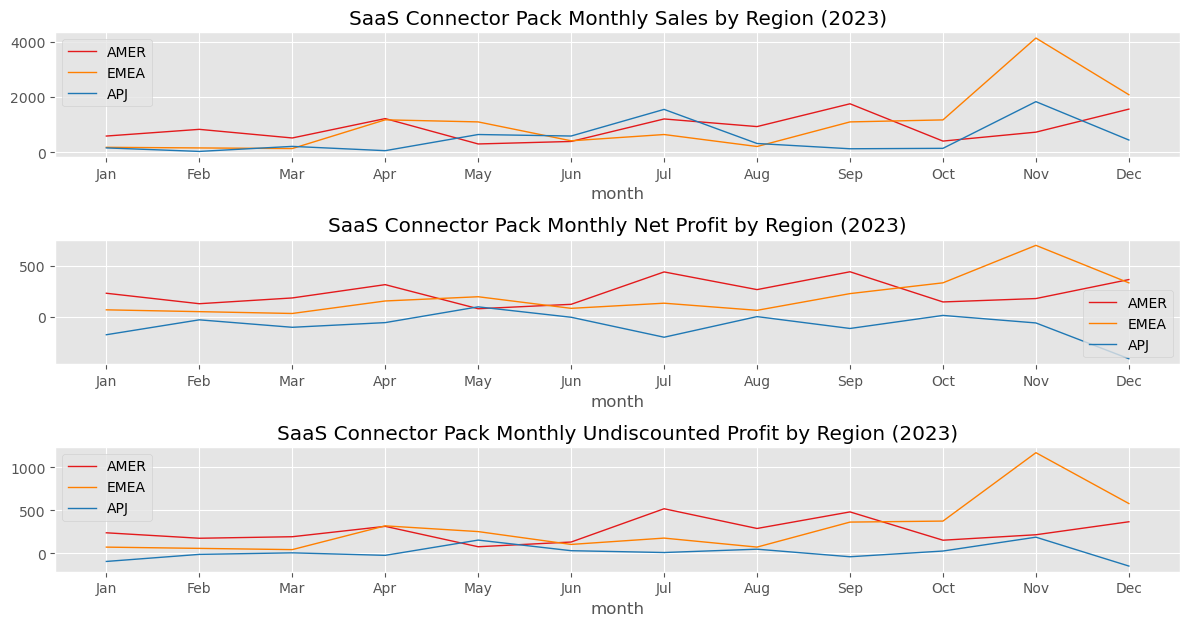

In [7]:
# SaaS Connector Pack Monthly Income EDA by Region (2023)
prod11_region_month = prod11_2023.groupby(['Region','month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
plt.figure(figsize=(12,8))

plt.subplot(411)
prod11_region_month.query("Region == 'AMER'").groupby('month')['Sales'].sum().plot(c='#e31a1c',linewidth=1)
prod11_region_month.query("Region == 'EMEA'").groupby('month')['Sales'].sum().plot(c='#ff7f00',linewidth=1)
prod11_region_month.query("Region == 'APJ'").groupby('month')['Sales'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('SaaS Connector Pack Monthly Sales by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(412)
prod11_region_month.query("Region == 'AMER'").groupby('month')['net_profit'].sum().plot(c='#e31a1c',linewidth=1)
prod11_region_month.query("Region == 'EMEA'").groupby('month')['net_profit'].sum().plot(c='#ff7f00',linewidth=1)
prod11_region_month.query("Region == 'APJ'").groupby('month')['net_profit'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('SaaS Connector Pack Monthly Net Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(413)
prod11_region_month.query("Region == 'AMER'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#e31a1c',linewidth=1)
prod11_region_month.query("Region == 'EMEA'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#ff7f00',linewidth=1)
prod11_region_month.query("Region == 'APJ'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('SaaS Connector Pack Monthly Undiscounted Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])


plt.tight_layout()
plt.show()

Monthly Regional Performance

All regions show significant fluctuations in sales and net profits, heavily relying on peaks. Discounts have a varied impact on profits, with some regions and months seeing more substantial effects. EMEA  have significant sales and profits in the latter part of the year. APJ has generally lower sales, fluctuates, and is negatively impacted from discounts. AMER is generally more stable with periodic peaks, particularly strong in April and September.
- AMER's performance relied heavily on periodic peaks in April, July, September, and December. Discounts notably affected net profits, particularly in February and October.
- EMEA's sales and net profits surged significantly from September onwards, with particularly strong performance in October, November, and December. Although discounts did affect net profits, EMEA managed to maintain positive net profits throughout the year.
- APJ's sales and net profits varied widely throughout the year. Discounts heavily impacted net profits, often resulting in negative figures despite substantial sales.

Performance Highlights
- Highest Sales: In EMEA, November shows the highest sales of 4127.8340.
- Highest Net Profit: The highest net profit is seen in EMEA, November, with a net profit of 699.3844.
- Highest Undiscounted Profit: EMEA in November also shows the highest undiscounted profit at 1168.3812.


In [8]:
prod11_region_month

,Region,month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,1,22,588.9860,579.2068,238.5250,228.7458
1,AMER,2,21,830.7660,781.4828,175.2472,125.9640
2,AMER,3,34,519.2540,509.0012,192.9515,182.6987
3,AMER,4,37,1219.3300,1219.3300,313.3590,313.3590
4,AMER,5,15,302.9600,302.9600,76.6042,76.6042
5,AMER,6,19,393.5240,382.1832,131.3802,120.0394
6,AMER,7,27,1205.9200,1126.5360,517.6744,438.2904
7,AMER,8,35,930.5060,906.3908,288.6726,264.5574
8,AMER,9,61,1753.6980,1712.6004,481.0078,439.9102
9,AMER,10,31,406.8480,397.6704,152.5156,143.3380


([0, 1, 2], [Text(0, 0, 'AMER'), Text(1, 0, 'APJ'), Text(2, 0, 'EMEA')])

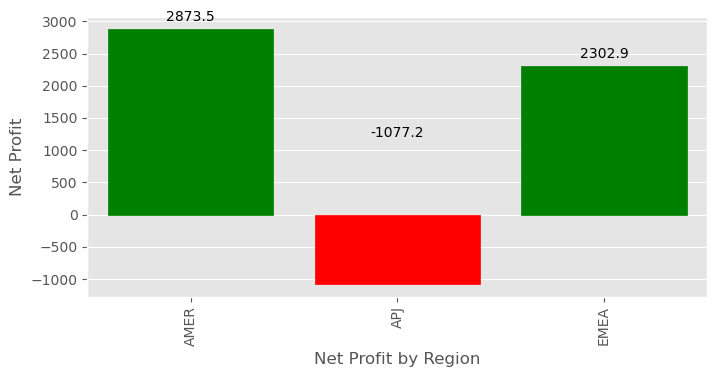

In [9]:
prod11_region = prod11_2023.groupby(['Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Region', y='net_profit', data=prod11_region)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Net Profit by Region')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

In [10]:
prod11_region

,Region,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,421,10442.1720,10165.3256,3150.3333,2873.4869
1,APJ,201,6126.8820,4903.1028,146.5671,-1077.2121
2,EMEA,475,12346.0400,11124.9920,3523.9360,2302.8880


High-Performing Region
- EMEA demonstrated the highest sales overall, while AMER achieved the highest net profit despite having lower sales than EMEA. 
- AMER faced challenges in maintaining consistent sales and profit levels throughout the year, relying heavily on periodic peaks to boost overall performance. Discounts significantly impacted net profits in several months, particularly in February and October, which reduced their overall profitability.
- EMEA showed moderate sales and profits in the initial months, indicating room for improvement in early-year strategies. While discounts did affect net profits, EMEA managed to maintain positive net profits but still saw a substantial impact from discounts.

Challenging Region
- APJ faced significant challenges with a negative net profit.
- Discounts heavily impacted net profits, often resulting in negative figures despite peaks in sales. Consider revising pricing or discount strategies.

In [8]:
grouped = prod11_2023.groupby(['Region', 'Segment', 'Industry'])
total_sales = grouped['Sales'].sum()
total_profit_before_discounts = grouped['(net)_profit_before_discount'].sum()
total_profit = grouped['net_profit'].sum()
avg_sales_per_order = grouped['Sales'].mean()
avg_discount = grouped['Discount'].mean()
profit_margin = (total_profit / total_sales) * 100

In [9]:
metrics = pd.DataFrame({
    'total_sales': total_sales,
    'avg_sales_per_order': avg_sales_per_order,
    'total_profit': total_profit,
    'total_profit before discounts':total_profit_before_discounts,
    'avg_discount': avg_discount,
    'profit_margin': profit_margin
}).reset_index()

metrics_sorted = metrics.sort_values(by=['Region', 'Segment', 'Industry'])

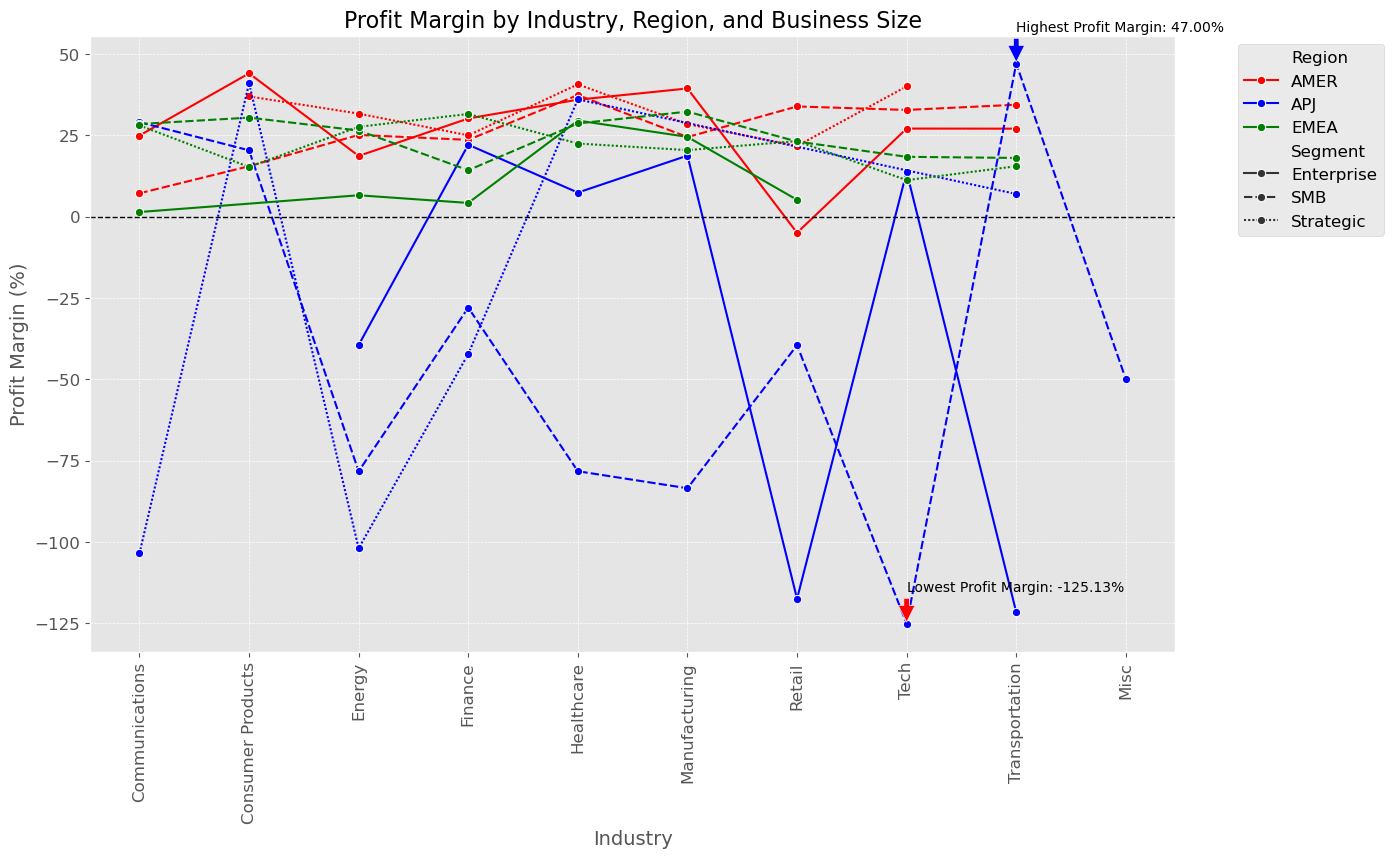

In [10]:
# Cross-segment line chart

# Define the color palette
palette = {
    'AMER': 'red',
    'EMEA': 'green',
    'APJ': 'blue'
}

plt.figure(figsize=(14, 8))
sns.lineplot(data=metrics_sorted, x='Industry', y='profit_margin', hue='Region', style='Segment', marker='o', palette=palette)
plt.title('Profit Margin by Industry, Region, and Business Size', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Add a black grid line at y=0
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Highlight highest and lowest profit margins
max_profit = metrics_sorted['profit_margin'].max()
min_profit = metrics_sorted['profit_margin'].min()
max_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == max_profit, 'Industry'].values[0]
min_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == min_profit, 'Industry'].values[0]

plt.annotate(
    f'Highest Profit Margin: {max_profit:.2f}%', 
    xy=(max_profit_industry, max_profit), 
    xytext=(max_profit_industry, max_profit + 10), 
    arrowprops=dict(facecolor='blue', shrink=0.05)
)

plt.annotate(
    f'Lowest Profit Margin: {min_profit:.2f}%', 
    xy=(min_profit_industry, min_profit), 
    xytext=(min_profit_industry, min_profit + 10), 
    arrowprops=dict(facecolor='red', shrink=0.05)
)

# Move legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


In [11]:
# Calculating the total profit for each group
total_profit = grouped['net_profit'].sum()
avg_discount = grouped['Discount'].mean()
# Creating a DataFrame to store the metrics
metrics = pd.DataFrame({
    'total_profit': total_profit,
    'avg_discount': avg_discount
}).reset_index()
# Filtering the metrics to show only the positive profits
positive_profit_metrics = metrics[metrics['total_profit'] > 0]
# Sorting the metrics DataFrame by Region, Segment, and Industry
metrics_sorted = positive_profit_metrics.sort_values(by=['Region', 'Segment', 'Industry'])


#### Cross-segment SMB

In [12]:
###Filter positive profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_positive_profit_metrics = smb_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

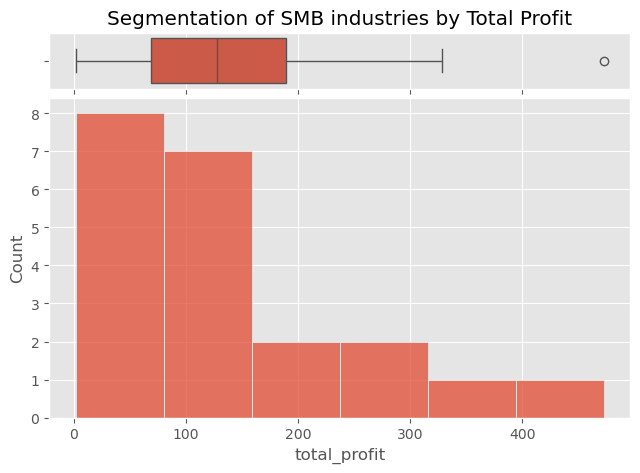

0.0000     1.3677
0.2500    68.6750
0.5000   127.8482
0.7500   188.6833
1.0000   472.7846
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 188.68 in profit
- 3 (Good) : Contributes between 127.85 and 188.68 in profit
- 2 (Marginal) : Contributes between 68.67 and 127.85 in profit
- 1 (Underperforming) : Contributes less than 68.67 in profit


In [13]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [14]:
smb_positive_profit_metrics['segmentation score'] = pd.qcut(
    smb_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

smb_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
13,AMER,SMB,Healthcare,472.7846,0.0750,4
56,EMEA,SMB,Energy,328.3139,0.0800,4
12,AMER,SMB,Finance,267.9628,0.0333,4
15,AMER,SMB,Retail,237.9902,0.0250,4
11,AMER,SMB,Energy,234.4497,0.0000,4
57,EMEA,SMB,Finance,188.6833,0.1385,3
58,EMEA,SMB,Healthcare,148.8861,0.1091,3
16,AMER,SMB,Tech,146.9628,0.0000,3
32,APJ,SMB,Communications,138.4170,0.0000,3
61,EMEA,SMB,Tech,131.3588,0.1111,3


In [15]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_positive_profit_metrics[smb_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the SMB segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese SMB industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Healthcare in AMER, Energy in EMEA, Finance in AMER, Retail in AMER, Energy in AMER are the highest performing industries in the SMB segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Finance in EMEA, Healthcare in EMEA, Tech in AMER, Communications in APJ, Tech in EMEA all maintain solid profitability.
While not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Manufacturing in EMEA, Consumer Products in APJ, Transportation in AMER, Retail in EMEA, Manufacturing in AMER, Consumer Products in AMER, Communications in EMEA, Transportation in EMEA, Consumer Products in EMEA, Communications in AMER, Transportation in APJ are underperforming.
These SMB industries struggle with profitability a

In [24]:
###Filter negative profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_negative_profit_metrics = smb_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

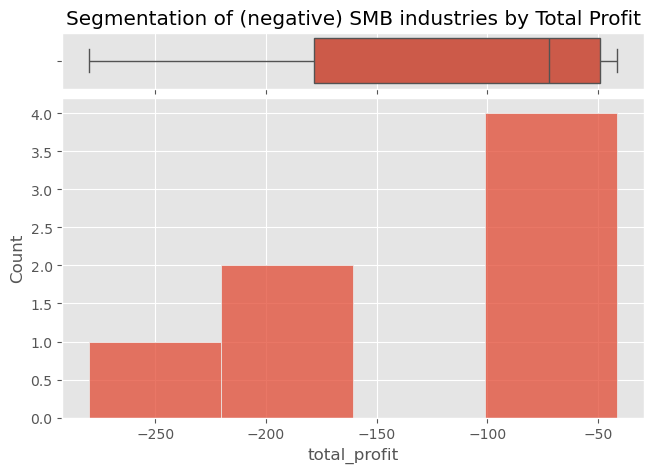

0.0000   -280.1262
0.2500   -178.1877
0.5000    -72.2500
0.7500    -49.1543
1.0000    -41.2620
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -178.19 in profit
- 3 (Significant) : Loses between -178.19 and -72.25 in profit
- 2 (Negative) : Loses between -72.25 and -49.15 in profit
- 1 (Marginal) : Loses less than -49.15 in profit


In [25]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [26]:
smb_negative_profit_metrics['segmentation score'] = pd.qcut(
    smb_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

smb_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
35,APJ,SMB,Finance,-280.1262,0.3600,4
40,APJ,SMB,Tech,-184.7607,0.3000,4
37,APJ,SMB,Manufacturing,-171.6148,0.6000,3
36,APJ,SMB,Healthcare,-72.2500,0.6000,3
34,APJ,SMB,Energy,-52.1686,0.6000,2
39,APJ,SMB,Retail,-46.1400,0.4000,1
38,APJ,SMB,Misc,-41.2620,0.6000,1


Looking at the losses in the SMB segment, it's clear that all the struggling industries are in the APJ region.

In [27]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_negative_profit_metrics[smb_negative_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")


list_industries_by_score([4], "are SMB industries contributing to substantial losses and are considered high-risk.\nStrategic improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.\n")
list_industries_by_score([3], "all suffer notable losses.\nCareful analysis and targeted strategies are essential to stabilize and mitigate further declines.\n")
list_industries_by_score([1, 2], "incur moderate losses.\nThey require attention to prevent slipping into more significant losses.\n")


Finance in APJ, Tech in APJ are SMB industries contributing to substantial losses and are considered high-risk.
Strategic improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.

Manufacturing in APJ, Healthcare in APJ all suffer notable losses.
Careful analysis and targeted strategies are essential to stabilize and mitigate further declines.

Energy in APJ, Retail in APJ, Misc in APJ incur moderate losses.
They require attention to prevent slipping into more significant losses.



Finance and Tech in APJ contribute significant losses to the SMB segment (-280.1262 and -184.7607, respectively). Other notable losses include Manufacturing (-171.6148) and Healthcare (-72.2500) in APJ.

Meanwhile, top-performing SMB industries are Healthcare in AMER (472.7846), Energy in EMEA (328.3139), and Finance in AMER (267.9628). These industries show substantial gains, indicating areas of strength and potential growth within their regions.

Comparing the two, total gains from top-performing SMB industries (1,541.5012) outweigh the notable losses (-708.7517) by 832.7495. This indicates that, overall, the SMB segment has a strong financial performance, despite notable losses in some industries within the APJ region. However, it's crucial to address and mitigate these losses to ensure sustained profitability and balanced growth across all regions.

In [28]:
# query for percentage loss if industries in the "Severe" category is cut off
# Calculate total metrics for the SMB segment
total_metrics_SMB = prod11.query("Segment == 'SMB'")[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].sum()

# Aggregate data by Industry and Region with (and net_profit < 0) filter 
prod11_2023_industry_region_SMB = prod11.query("Segment == 'SMB' and net_profit < 0").groupby(['Industry', 'Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum').reset_index()

# Count unique Order IDs by Industry and Region
SMB_account = prod11.query("Segment == 'SMB'").groupby(['Industry', 'Region'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','Region','account']

# Merge dataframes and calculate percentages
prod11_2023_percents_SMB = SMB_account.merge(prod11_2023_industry_region_SMB, how='left', on=['Industry', 'Region'])

# Drop rows with NaN values
prod11_2023_percents_SMB = prod11_2023_percents_SMB.dropna()

# Calculate percentages
prod11_2023_percents_SMB['% Account'] = prod11_2023_percents_SMB['account'] / SMB_account['account'].sum() * 100
prod11_2023_percents_SMB['% Quantity'] = prod11_2023_percents_SMB['Quantity'] / total_metrics_SMB['Quantity'] * 100
prod11_2023_percents_SMB['% Sales'] = prod11_2023_percents_SMB['Sales'] / total_metrics_SMB['Sales'] * 100
prod11_2023_percents_SMB['% Net Revenue'] = prod11_2023_percents_SMB['discounted_sales'] / total_metrics_SMB['discounted_sales'] * 100

# Filter data for specific industries and regions
specific_industries = ['Finance', 'Tech', 'Manufacturing', 'Healthcare']  
specific_regions = ['APJ']
filtered_SMB = prod11_2023_percents_SMB[(prod11_2023_percents_SMB['Industry'].isin(specific_industries)) & 
                                       (prod11_2023_percents_SMB['Region'].isin(specific_regions))]

# Group by Industry and Region to get the percentages
filtered_percentages = filtered_SMB.groupby(['Industry', 'Region'])[['% Account', '% Quantity', '% Sales', '% Net Revenue']].sum()

To assess the impact of high discounts on net profits, I compared two datasets: one without a filter for negative profits and another with a filter for net profits less than zero.

In [29]:
# to see detailed Discounted orders for SMB industries with significant losses
filtered_SMB2 = prod11_2023[(prod11_2023['Industry'].isin(specific_industries)) & (prod11_2023['Region'].isin(specific_regions)) ]
filtered_SMB3 = filtered_SMB2[filtered_SMB2['Segment'] == 'SMB']
grouped_data = filtered_SMB3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [30]:
# Dataset Without Filter
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Finance,APJ,0.0000,2
1,Finance,APJ,0.6000,3
2,Healthcare,APJ,0.6000,2
3,Manufacturing,APJ,0.6000,6
4,Tech,APJ,0.0000,1
5,Tech,APJ,0.6000,1


In [31]:
# Dataset With Filter (prod11_2023['net_profit'] < 0) 
filtered_SMB2 = prod11_2023[(prod11_2023['Industry'].isin(specific_industries)) & (prod11_2023['Region'].isin(specific_regions)) & (prod11_2023['net_profit'] < 0) ]
filtered_SMB3 = filtered_SMB2[filtered_SMB2['Segment'] == 'SMB']
grouped_data = filtered_SMB3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [32]:
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Finance,APJ,0.6000,3
1,Healthcare,APJ,0.6000,2
2,Manufacturing,APJ,0.6000,6
3,Tech,APJ,0.6000,1


By comparing the two datasets, I identified SMB orders with significant negative net profits. This analysis showed that higher discounts (0.6000) consistently appeared in both datasets, particularly in the filtered one for negative profits. 

Negative profits are thus associated with discounted orders, suggesting these discounts may have been applied without thorough profitability assessments. Proper evaluations should include analyzing the impact on net margins, understanding the cost structure, assessing customer acquisition costs, and ensuring the discount strategy aligns with overall financial goals. Thorough calculations would help ensure discounts contribute positively to profitability rather than resulting in losses.

#### Cross-segment Strategic

In [16]:
###Filter positive profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the strategic segment
strategic_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_positive_profit_metrics = strategic_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

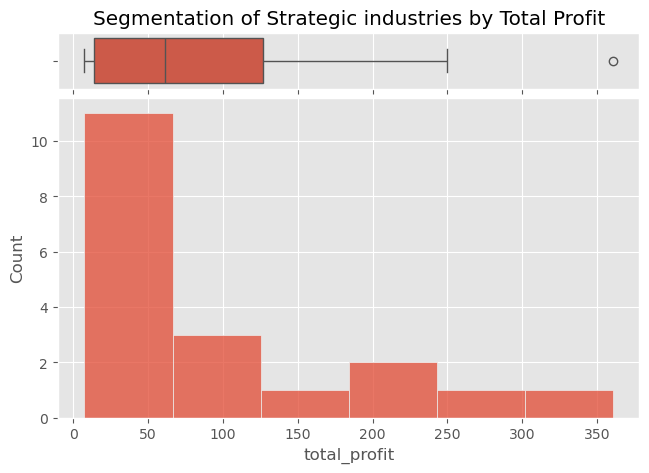

0.0000     7.5840
0.2500    13.9894
0.5000    61.6313
0.7500   126.5488
1.0000   360.4865
Name: total_profit, dtype: float64
Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 126.55 in profit
- 3 (Good) : Contributes between 61.63 and 126.55 in profit
- 2 (Marginal) : Contributes between 13.99 and 61.63 in profit
- 1 (Underperforming) : Contributes less than 13.99 in profit


In [17]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [18]:
strategic_positive_profit_metrics['segmentation score'] = pd.qcut(
    strategic_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

strategic_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
20,AMER,Strategic,Finance,360.4865,0.0000,4
66,EMEA,Strategic,Finance,249.7941,0.0769,4
65,EMEA,Strategic,Energy,220.9450,0.0500,4
69,EMEA,Strategic,Retail,197.3676,0.0500,4
21,AMER,Strategic,Healthcare,140.6756,0.0000,4
43,APJ,Strategic,Consumer Products,112.4220,0.0000,3
71,EMEA,Strategic,Transportation,95.7955,0.0000,3
70,EMEA,Strategic,Tech,91.0412,0.0600,3
19,AMER,Strategic,Energy,63.1377,0.0667,3
68,EMEA,Strategic,Manufacturing,61.6313,0.1333,2


In [19]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_positive_profit_metrics[strategic_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Strategic segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Strategic industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")

Finance in AMER, Finance in EMEA, Energy in EMEA, Retail in EMEA, Healthcare in AMER are the highest performing industries in the Strategic segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Consumer Products in APJ, Transportation in EMEA, Tech in EMEA, Energy in AMER all maintain solid profitability.
While not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Manufacturing in EMEA, Consumer Products in AMER, Manufacturing in AMER, Retail in AMER, Communications in EMEA, Healthcare in EMEA, Healthcare in APJ, Transportation in APJ, Consumer Products in EMEA, Tech in AMER are underperforming.
These Strategic industries struggle with profitability and should be approached with cauti

In [33]:
###Filter negative profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Strategic segment
strategic_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_negative_profit_metrics = strategic_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

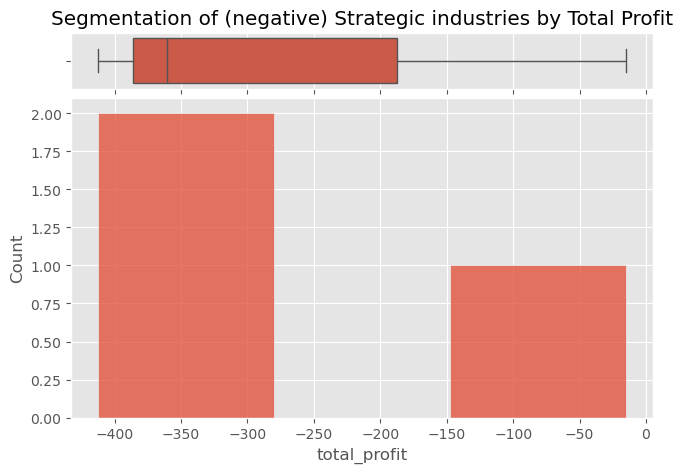

0.0000   -412.7444
0.2500   -386.5125
0.5000   -360.2806
0.7500   -187.6219
1.0000    -14.9633
Name: total_profit, dtype: float64
Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -386.51 in profit
- 3 (Significant) : Loses between -386.51 and -360.28 in profit
- 2 (Negative) : Loses between -360.28 and -187.62 in profit
- 1 (Marginal) : Loses less than -187.62 in profit


In [34]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [35]:
strategic_negative_profit_metrics['segmentation score'] = pd.qcut(
    strategic_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

strategic_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
42,APJ,Strategic,Communications,-412.7444,0.3000,4
44,APJ,Strategic,Energy,-360.2806,0.6000,3
45,APJ,Strategic,Finance,-14.9633,0.6000,1


Similar to the SMB segment, the Strategic segment also experiences significant losses from industries within the APJ region.

In [38]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_negative_profit_metrics[strategic_negative_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")


list_industries_by_score([4], "is a Strategic industry contributing to substantial losses and is considered high-risk.\nKey improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.\n")
list_industries_by_score([3], "suffer notable losses.\nCareful analysis and targeted strategies is essential to stabilize and mitigate further declines.\n")
list_industries_by_score([1, 2], "incur moderate losses.\nIt require attention to prevent slipping into more significant losses.\n")

Communications in APJ is a Strategic industry contributing to substantial losses and is considered high-risk.
Key improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.

Energy in APJ suffer notable losses.
Careful analysis and targeted strategies is essential to stabilize and mitigate further declines.

Finance in APJ incur moderate losses.
It require attention to prevent slipping into more significant losses.



Communications and Energy in the APJ region contribute significant losses to the Strategic segment (-412.7444 and -360.2806, respectively). Additionally, the Finance industry in APJ also incurs a loss of -14.9633.

Meanwhile, top-performing Strategic industries are Finance in AMER (360.4865), Finance in EMEA (249.7941), Energy in EMEA (220.9450), Retail in EMEA (197.3676), and Healthcare in AMER (140.6756). These industries show substantial gains, indicating areas of strength and potential growth within their regions.

Comparing the two, total gains (1,169.2688) outweigh the total losses (-787.9883) by 381.2805. This indicates that, overall, the Strategic segment has a positive financial performance despite substantial losses in some industries within the APJ region. However, addressing and mitigating these losses is crucial for sustained profitability and balanced growth.

In [41]:
# query for percentage loss if industries in the "Severe" category is cut off
# Calculate total metrics for the Strategic segment
total_metrics_strategic = prod11.query("Segment == 'Strategic'")[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].sum()

# Aggregate data by Industry and Region with (and net_profit < 0) filter 
prod11_2023_industry_region_strategic = prod11.query("Segment == 'Strategic' and net_profit < 0").groupby(['Industry', 'Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum').reset_index()

# Count unique Order IDs by Industry and Region
strategic_account = prod11.query("Segment == 'Strategic'").groupby(['Industry', 'Region'])[['Order ID']].nunique().reset_index()
strategic_account.columns = ['Industry','Region','account']

# Merge dataframes and calculate percentages
prod11_2023_percents_strategic = strategic_account.merge(prod11_2023_industry_region_strategic, how='left', on=['Industry', 'Region'])

# Drop rows with NaN values
prod11_2023_percents_strategic = prod11_2023_percents_strategic.dropna()

# Calculate percentages
prod11_2023_percents_strategic['% Account'] = prod11_2023_percents_strategic['account'] / strategic_account['account'].sum() * 100
prod11_2023_percents_strategic['% Quantity'] = prod11_2023_percents_strategic['Quantity'] / total_metrics_strategic['Quantity'] * 100
prod11_2023_percents_strategic['% Sales'] = prod11_2023_percents_strategic['Sales'] / total_metrics_strategic['Sales'] * 100
prod11_2023_percents_strategic['% Net Revenue'] = prod11_2023_percents_strategic['discounted_sales'] / total_metrics_strategic['discounted_sales'] * 100

# Filter data for specific industries and regions
specific_industries = ['Communications', 'Energy']
specific_regions = ['APJ']
filtered_strategic = prod11_2023_percents_strategic[(prod11_2023_percents_strategic['Industry'].isin(specific_industries)) & 
                                       (prod11_2023_percents_strategic['Region'].isin(specific_regions))]

# Group by Industry and Region to get the percentages
filtered_percentages = filtered_strategic.groupby(['Industry', 'Region'])[['% Account', '% Quantity', '% Sales', '% Net Revenue']].sum()

To assess the impact of high discounts on net profits, I compared two datasets: one without a filter for negative profits and another with a filter for net profits less than zero.

In [ ]:
# to see detailed Discounted orders for Strategic industries with significant losses
filtered_strategic2 = prod11_2023[(prod11_2023['Industry'].isin(specific_industries)) & (prod11_2023['Region'].isin(specific_regions)) ]
filtered_strategic3 = filtered_strategic2[filtered_strategic2['Segment'] == 'Strategic']
grouped_data = filtered_strategic3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [43]:
# Dataset Without Filter
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Communications,APJ,0.0000,1
1,Communications,APJ,0.6000,1
2,Energy,APJ,0.6000,2


In [44]:
# Dataset With Filter (prod11_2023['net_profit'] < 0) 
filtered_strategic2 = prod11_2023[(prod11_2023['Industry'].isin(specific_industries)) & (prod11_2023['Region'].isin(specific_regions)) & (prod11_2023['net_profit'] < 0) ]
filtered_strategic3 = filtered_strategic2[filtered_strategic2['Segment'] == 'Strategic']
grouped_data = filtered_strategic3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [45]:
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Communications,APJ,0.6000,1
1,Energy,APJ,0.6000,2


By comparing the two datasets, I identified which Strategic orders had negative net profits. This comparison highlighted that orders with higher discounts (0.6000) appeared in both datasets, especially in the filtered one for negative profits.

Again, it can be observed that negative profits are associated with high discounted orders, suggesting that these discounts may have been applied without thorough calculations of profitability. This includes evaluating the impact on net margins, understanding the cost structure, assessing customer acquisition costs, and ensuring that the discount strategy aligns with overall financial goals.

#### Cross-segment Enterprise

In [20]:
###Filter positive profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_positive_profit_metrics = enterprise_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

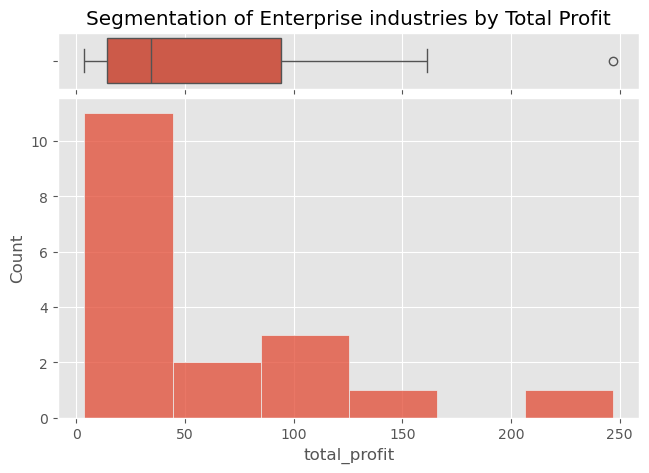

0.0000     3.7422
0.2500    14.2278
0.5000    34.3554
0.7500    94.1411
1.0000   246.9024
Name: total_profit, dtype: float64
Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 94.14 in profit
- 3 (Good) : Contributes between 34.36 and 94.14 in profit
- 2 (Marginal) : Contributes between 14.23 and 34.36 in profit
- 1 (Underperforming) : Contributes less than 14.23 in profit


In [21]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [22]:
enterprise_positive_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

enterprise_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
26,APJ,Enterprise,Finance,246.9024,0.3600,4
7,AMER,Enterprise,Tech,161.2527,0.0400,4
2,AMER,Enterprise,Energy,125.1291,0.0000,4
3,AMER,Enterprise,Finance,115.5486,0.0000,4
4,AMER,Enterprise,Healthcare,98.2770,0.0400,4
53,EMEA,Enterprise,Retail,81.7334,0.1500,3
52,EMEA,Enterprise,Manufacturing,64.3554,0.0500,3
27,APJ,Enterprise,Healthcare,40.1784,0.0000,3
51,EMEA,Enterprise,Healthcare,36.2788,0.0000,3
28,APJ,Enterprise,Manufacturing,32.4320,0.1500,2


In [23]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = enterprise_positive_profit_metrics[enterprise_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Enterprise segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Enterprise industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Finance in APJ, Tech in AMER, Energy in AMER, Finance in AMER, Healthcare in AMER are the highest performing industries in the Enterprise segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Retail in EMEA, Manufacturing in EMEA, Healthcare in APJ, Healthcare in EMEA all maintain solid profitability.
While not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Manufacturing in APJ, Energy in EMEA, Communications in AMER, Manufacturing in AMER, Finance in EMEA, Transportation in AMER, Consumer Products in AMER, Tech in APJ, Communications in EMEA are underperforming.
These Enterprise industries struggle with profitability and should be approached with caution.
Strategies should focus 

In [47]:
###Filter negative profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_negative_profit_metrics = enterprise_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

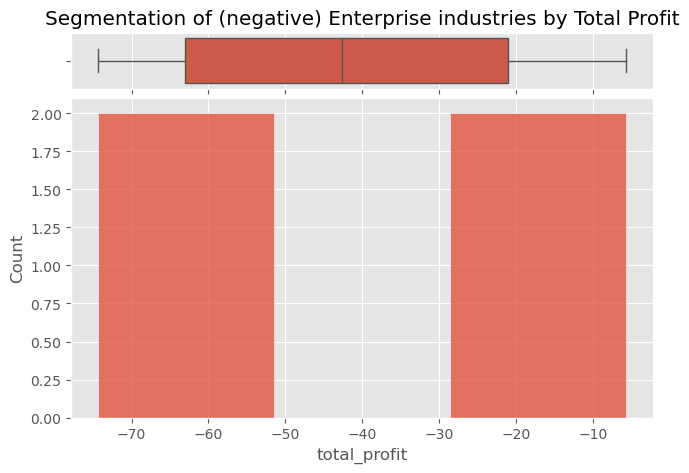

0.0000   -74.4088
0.2500   -63.0078
0.5000   -42.6462
0.7500   -20.9834
1.0000    -5.6784
Name: total_profit, dtype: float64
Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -63.01 in profit
- 3 (Significant) : Loses between -63.01 and -42.65 in profit
- 2 (Negative) : Loses between -42.65 and -20.98 in profit
- 1 (Marginal) : Loses less than -20.98 in profit


In [48]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [49]:
enterprise_negative_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

enterprise_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
31,APJ,Enterprise,Transportation,-74.4088,0.6000,4
25,APJ,Enterprise,Energy,-59.2074,0.2000,3
29,APJ,Enterprise,Retail,-26.0850,0.6000,2
6,AMER,Enterprise,Retail,-5.6784,0.2000,1


Like with all segments, industries which cause the most significant loss in the Enterprise segment also originated within the APJ region.

In [52]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = enterprise_negative_profit_metrics[enterprise_negative_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")


list_industries_by_score([4], "is an Enterprise industry contributing to substantial losses and is considered high-risk.\nKey improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.\n")
list_industries_by_score([3], "suffer notable loss.\nCareful analysis and targeted strategies is essential to stabilize and mitigate further declines.\n")
list_industries_by_score([1, 2], "incur moderate losses.\nThey require attention to prevent slipping into more significant losses.\n")

Transportation in APJ is an Enterprise industry contributing to substantial losses and is considered high-risk.
Key improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.

Energy in APJ suffer notable loss.
Careful analysis and targeted strategies is essential to stabilize and mitigate further declines.

Retail in APJ, Retail in AMER incur moderate losses.
They require attention to prevent slipping into more significant losses.



Transportation in APJ contributes the highest losses to the Enterprise segment (-74.4088), followed by Energy in APJ (-59.2074) and Retail in APJ (-26.0850). Retail in AMER also incurs a loss of -5.6784.

Meanwhile, top-performing Enterprise industries are Finance in APJ (246.9024), Tech in AMER (161.2527), Energy in AMER (125.1291), Finance in AMER (115.5486), and Healthcare in AMER (98.2770). These industries show substantial gains, indicating areas of strength and potential growth within their regions.

Comparing the two, total gains (747.1098) outweigh the total losses (-165.3796) by 581.7302. This indicates that, overall, the Enterprise segment has a strong financial performance, despite notable losses in some industries within the APJ region. However, it's crucial to address and mitigate these losses to ensure sustained profitability and balanced growth across all regions.


In [53]:
# query for percentage loss if industries in the "Severe" category is cut off
# Calculate total metrics for the Enterprise segment
total_metrics_enterprise = prod11.query("Segment == 'Enterprise'")[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].sum()

# Aggregate data by Industry and Region with (and net_profit < 0) filter 
prod11_2023_industry_region_enterprise = prod11.query("Segment == 'Enterprise' and net_profit < 0").groupby(['Industry', 'Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum').reset_index()

# Count unique Order IDs by Industry and Region
enterprise_account = prod11.query("Segment == 'Enterprise'").groupby(['Industry', 'Region'])[['Order ID']].nunique().reset_index()
enterprise_account.columns = ['Industry','Region','account']

# Merge dataframes and calculate percentages
prod11_2023_percents_enterprise = enterprise_account.merge(prod11_2023_industry_region_enterprise, how='left', on=['Industry', 'Region'])

# Drop rows with NaN values
prod11_2023_percents_enterprise = prod11_2023_percents_enterprise.dropna()

# Calculate percentages
prod11_2023_percents_enterprise['% Account'] = prod11_2023_percents_enterprise['account'] / enterprise_account['account'].sum() * 100
prod11_2023_percents_enterprise['% Quantity'] = prod11_2023_percents_enterprise['Quantity'] / total_metrics_enterprise['Quantity'] * 100
prod11_2023_percents_enterprise['% Sales'] = prod11_2023_percents_enterprise['Sales'] / total_metrics_enterprise['Sales'] * 100
prod11_2023_percents_enterprise['% Net Revenue'] = prod11_2023_percents_enterprise['discounted_sales'] / total_metrics_enterprise['discounted_sales'] * 100

# Filter data for specific industries and regions
specific_industries = ['Transportation', 'Energy', 'Retail']
specific_regions = ['APJ', 'AMER']
filtered_enterprise = prod11_2023_percents_enterprise[(prod11_2023_percents_enterprise['Industry'].isin(specific_industries)) & 
                                       (prod11_2023_percents_enterprise['Region'].isin(specific_regions))]

# Group by Industry and Region to get the percentages
filtered_percentages = filtered_enterprise.groupby(['Industry', 'Region'])[['% Account', '% Quantity', '% Sales', '% Net Revenue']].sum()

To assess the impact of high discounts on net profits, I compared two datasets: one without a filter for negative profits and another with a filter for net profits less than zero.

In [54]:
# to see detailed Discounted orders for Enterprise industries with significant losses
filtered_enterprise2 = prod11_2023[(prod11_2023['Industry'].isin(specific_industries)) & (prod11_2023['Region'].isin(specific_regions)) ]
filtered_enterprise3 = filtered_enterprise2[filtered_enterprise2['Segment'] == 'Enterprise']
grouped_data = filtered_enterprise3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [55]:
# Dataset Without Filter
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Energy,AMER,0.0000,3
1,Energy,APJ,0.0000,2
2,Energy,APJ,0.6000,1
3,Retail,AMER,0.2000,1
4,Retail,APJ,0.6000,1
5,Transportation,AMER,0.0000,1
6,Transportation,APJ,0.6000,2


In [56]:
# Dataset With Filter (prod11_2023['net_profit'] < 0) 
filtered_enterprise2 = prod11_2023[(prod11_2023['Industry'].isin(specific_industries)) & (prod11_2023['Region'].isin(specific_regions)) & (prod11_2023['net_profit'] < 0)  ]
filtered_enterprise3 = filtered_enterprise2[filtered_enterprise2['Segment'] == 'Enterprise']
grouped_data = filtered_enterprise3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [57]:
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Energy,APJ,0.6000,1
1,Retail,AMER,0.2000,1
2,Retail,APJ,0.6000,1
3,Transportation,APJ,0.6000,2


By comparing the two datasets, I identified Enterprise orders with negative net profits. This analysis showed that higher discounts (0.6000) consistently appeared in both datasets, particularly in the filtered one for negative profits. Additionally, there is an order with 20% discounts which also resulted in loss, indicating that even moderate discounts can lead to negative profits if not carefully calculated.

**Key findings:**
1. AMER's financial performance relies on peaks in April, July, September, and December. However, consistent sales and profits are challenging throughout the year, with discounts notably affecting net profits in February and October. Despite this, AMER shows strong performance during peak months.
2. EMEA region experiences substantial growth in sales and net profits from September, peaking in October, November, and December. It maintains positive net profits throughout the year despite discounts, demonstrating overall resilience and potential for early-year strategy improvements. EMEA has the highest performance in sales and net profits.
3. APJ region faces significant fluctuations in sales and net profits throughout the year, often resulting in negative figures due to heavy discount impacts. Despite substantial sales peaks, discounts erode net profits, indicating a need to revise pricing or discount strategies to improve profitability.
4. SMB segment faces significant losses in Finance and Tech within APJ, but top-performing industries like Healthcare in AMER and Energy in EMEA show strong gains. Overall, gains surpass losses, highlighting a robust financial performance despite challenges in APJ.
5. Strategic segment sees notable losses in Communications and Energy within APJ, yet Finance in AMER and EMEA, along with Energy and Retail in EMEA, show substantial gains. These gains outweigh the losses, indicating a positive financial outlook, though APJ losses need addressing.
6. In the Enterprise segment, APJ struggles with losses in Transportation, Energy, and Retail, but top industries such as Finance in APJ, Tech, and Energy in AMER show strong gains. Gains exceed losses, highlighting solid financial health, but addressing APJ losses is crucial.